In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision
from sklearn.svm import SVC,LinearSVC
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
import seaborn as sns
#torch.manual_seed(125)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Generate dataset

In [2]:
y = np.random.randint(0,3,150)
idx= []
for i in range(3):
    print(i,sum(y==i))
    idx.append(y==i)

0 50
1 52
2 48


In [3]:
x = np.zeros((150,2))
# x1 = np.zeros((500,2))

In [4]:
x[idx[0]] = np.random.uniform(low =[-5,0],high =[50,50],size= (sum(idx[0]),2))
x[idx[1]] = np.random.uniform(low =[-5,100],high =[50,150],size= (sum(idx[1]),2))
x[idx[2]] = np.random.uniform(low =[90,0],high =[150,120],size= (sum(idx[2]),2))


In [5]:
boundary_points =  np.array([[-5,0],[50,50],[50,0],[-5,50],[-5,100],[-5,150],[50,100],[50,150],[90,0],[150,120],[90,120],[150,0]])
y_boundary_pts = np.array([0,0,0,0,1,1,1,1,2,2,2,2])


In [6]:
# # x,y = np.concatenate((x,x1),axis=0),np.concatenate((y,y),axis=0)
# x.shape,y.shape

# Visualise Data Distribution

In [7]:
# for i in range(3):
#     #y= np.zeros(x[idx[i]].shape[0])
#     plt.scatter(boundary_points[y_boundary_pts==i,0],boundary_points[y_boundary_pts==i,1],label="class_"+str(i))
# #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig('distribution2.pdf')
# plt.savefig('distribution2.png')


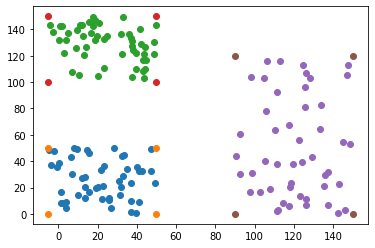

In [8]:
for i in range(3):
    #y= np.zeros(x[idx[i]].shape[0])
    plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
    plt.scatter(boundary_points[y_boundary_pts==i,0],boundary_points[y_boundary_pts==i,1],label="class_"+str(i))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("distribution4.png")
plt.savefig("distribution4.pdf")

In [9]:
foreground_classes = {'class_0','class_1'}

background_classes = {'class_2'}

In [10]:
# fg_class  = np.random.randint(0,2)
# fg_idx = np.random.randint(0,3)
# bg_class = 2
# a = []
# for i in range(3):
#     if i == fg_idx:
#         b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
#         a.append(x[b])
#         print("foreground "+str(fg_class)+" present at " + str(fg_idx))
#     else:
        
#         b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
#         a.append(x[b])
#         print("background "+str(bg_class)+" present at " + str(i))
# a = np.concatenate(a,axis=0)
# #print(a.shape)

# print(fg_class , fg_idx)

In [11]:
# a

In [12]:
desired_num = 1000
mosaic_list =[]
mosaic_label = []
fore_idx=[]
for j in range(desired_num):
    fg_class  = np.random.randint(0,2)
    fg_idx = np.random.randint(0,3)
    bg_class = 2
    a = []
    for i in range(3):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list.append(np.reshape(a,(6,1)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

In [13]:
mosaic_list = np.concatenate(mosaic_list,axis=1).T
print(mosaic_list)

[[137.49959606   6.55875447 118.53972229  23.81728044  -3.57892486
   36.95645861]
 [ 47.46597505  49.27661523 147.60707919 112.94376879 133.39784784
   64.22278391]
 [ 10.5685211  105.26355211 143.21166145  23.05633873 135.95991422
   29.27721963]
 ...
 [111.61486018   2.00028221 104.7834089  103.13614727  32.80895414
  149.66461669]
 [143.21166145  23.05633873 135.95991422  29.27721963  20.96779472
  144.54702904]
 [  0.37924733  38.77065622 148.69653403  52.70685751  92.80746048
   60.34685622]]


In [14]:
print(np.shape(mosaic_label))
print(np.shape(fore_idx))

(1000,)
(1000,)


In [15]:

x_b = []
y_b = []
f_index = []
for i in range(3):
  'pos'
  for j in range(8):
    for k in range(8,12,1):
      for l in range(8,12,1):
        a = []
        if i ==0:
          a.append(boundary_points[j])
          a.append(boundary_points[k])
          a.append(boundary_points[l])
          f_index.append(i)
        elif i==1:
          a.append(boundary_points[k])
          a.append(boundary_points[j])
          a.append(boundary_points[l])
          f_index.append(i)
        elif i==2:
          a.append(boundary_points[k])
          a.append(boundary_points[l])
          a.append(boundary_points[j])
          f_index.append(i)
        y_b.append(y_boundary_pts[j])

        a = np.concatenate(a,axis=0)
        x_b.append(list(np.reshape(a,6)))
          

x_b = np.array(x_b)
y_b = np.array(y_b)

In [16]:
x_b[11:15]

array([[ -5,   0,  90, 120, 150,   0],
       [ -5,   0, 150,   0,  90,   0],
       [ -5,   0, 150,   0, 150, 120],
       [ -5,   0, 150,   0,  90, 120]])

In [17]:
mosaic_list = np.concatenate((mosaic_list,x_b),axis=0)
mosaic_label = np.concatenate((mosaic_label,y_b),axis=0)
fore_idx = np.concatenate((fore_idx,f_index),axis=0)

In [18]:
print(mosaic_list.shape,mosaic_label.shape,fore_idx.shape)

(1384, 6) (1384,) (1384,)


In [19]:
class MosaicDataset(Dataset):
    """MosaicDataset dataset."""
    
    
    def __init__(self, mosaic_list, mosaic_label, fore_idx):
        """
          Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.mosaic = mosaic_list
        self.label = mosaic_label
        self.fore_idx = fore_idx

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=False)

In [20]:
# batch = 50
# msd_boundary = MosaicDataset(x_b, y_b , f_index)
# train_loader_boundary = DataLoader( msd_boundary,batch_size= batch ,shuffle=True)

In [21]:
class Wherenet(nn.Module):
    def __init__(self):
        super(Wherenet,self).__init__()
        self.linear1 = nn.Linear(2,1)
    def forward(self,z):
        batch = z.shape[0]
        x = torch.zeros([batch,3],dtype=torch.float64)
        y = torch.zeros([batch,2], dtype=torch.float64)
        #x,y = x.to("cuda"),y.to("cuda")
        for i in range(3):
            x[:,i] = self.helper(z[:,2*i:2*i+2])[:,0]
            #print(k[:,0].shape,x[:,i].shape)
        x = F.softmax(x,dim=1)   # alphas
        #print(x.shape)
        x1 = x[:,0]
        for i in range(3):
            x1 = x[:,i]          
            y = y+torch.mul(x1[:,None],z[:,2*i:2*i+2])
        return y , x 

    
    def helper(self,x):
        x = self.linear1(x)
        #x = F.relu(self.linear2(x))
        #x = self.linear3(x)
        
        return x

    

In [22]:
where = Wherenet().double()


In [23]:
def focus_map(focus_net):
    plt.figure(figsize=(6,6))
    X,Y = torch.meshgrid(torch.linspace(-5,150,100), torch.linspace(-5,150,100))
    n=X.shape[0]*X.shape[1]
    data = torch.zeros((n,2)).double()
    data[:,0]=X.reshape((-1,))
    data[:,1]=Y.reshape((-1,))
    Z = []
    batch = 50
    iter = data.shape[0]//batch
    for i in range(iter):
        #print(data[i*batch:(i+1)*batch].shape)
        Z_ = focus_net.helper(data[i*batch:(i+1)*batch]).detach().numpy()
        Z.append(Z_)
    Z = np.concatenate(Z,axis=0)
    Z = Z.reshape(X.shape)
    plt.title("focus_map")
    plt.contourf(X,Y,Z,)
    plt.colorbar()

In [24]:
class Whatnet(nn.Module):
    def __init__(self):
        super(Whatnet,self).__init__()
        self.linear1 = nn.Linear(2,2)
#         self.linear2 = nn.Linear(8,16)
#         self.linear3 = nn.Linear(16,3)
    def forward(self,x):
        x = self.linear1(x)
#         x = F.relu(self.linear2(x))
#         x = self.linear3(x)
        return x

In [25]:
what =Whatnet().double()


In [26]:
def classification_map(class_net):
    plt.figure(figsize=(6,6))
    X,Y = torch.meshgrid(torch.linspace(-5,150,100), torch.linspace(-5,150,100))
    n=X.shape[0]*X.shape[1]
    data = torch.zeros((n,2)).double()
    data[:,0]=X.reshape((-1,))
    data[:,1]=Y.reshape((-1,))
    Z = []
    batch =50
    iter = data.shape[0]//batch
    for i in range(iter):
        #print(data[i*batch:(i+1)*batch].shape)
        Z_ = class_net(data[i*batch:(i+1)*batch]).detach().numpy()
        Z.append(Z_)
    Z = np.concatenate(Z,axis=0)
    Z1 = Z[:,0].reshape(X.shape)
    Z2 = Z[:,1].reshape(X.shape)
    plt.title("classification map")
    cmap_val= torch.sigmoid(torch.Tensor(Z1- Z2) ).numpy() 
    plt.contourf(X,Y,Z1)
    plt.colorbar()


In [27]:
X = []
Y = []
for i, data in  enumerate(train_loader):
    inputs , labels , fore_idx = data
        
    X.append(inputs.numpy())
    Y.append(labels.numpy())
X = np.concatenate(X,axis=0)
Y  = np.concatenate(Y,axis=0)

In [28]:
clf = LinearSVC(C = 100000,random_state = 1)

In [29]:
clf.fit(X,Y)
print(clf.score(X,Y))

0.7341040462427746


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
def disp_plot(data,avg_data,true_label,pred_label,alpha,true_idx):
    plt.figure(figsize=(6,6))
    data = data.numpy()
    alpha = alpha.detach().numpy()
    avg_data = avg_data.detach().numpy()
 
    x = data[:,0:2]
    y = data[:,2:4]
    z = data[:,4:6]
    colors = ['b','g','r','c','m','y','k','teal','indigo','peru']
    
    #print(data[0],avg_data[0])
    for i in range(len(x)):
        plt.plot([x[i,0],y[i,0]],[x[i,1],y[i,1]],color= colors[i])#,marker ='o-')
        plt.plot([z[i,0],y[i,0]],[z[i,1],y[i,1]],color= colors[i])#,marker ='o-')
        plt.plot([x[i,0],z[i,0]],[x[i,1],z[i,1]],color= colors[i])#,marker ='o-')
#         print("dssda",avg_data[i,0],avg_data[i,1])
#         print("aaaaa",x,y,z)
        plt.plot(avg_data[i,0], avg_data[i,1],marker="x", markersize=12, color= colors[i])
        


[1,     5] loss: 9.908
[1,    5] accuracy: 0.506
[2,     5] loss: 6.663
[2,    5] accuracy: 0.492
[3,     5] loss: 4.580
[3,    5] accuracy: 0.335
[4,     5] loss: 4.295
[4,    5] accuracy: 0.535
[5,     5] loss: 2.902
[5,    5] accuracy: 0.623
[6,     5] loss: 2.524
[6,    5] accuracy: 0.546
[7,     5] loss: 2.003
[7,    5] accuracy: 0.540
[8,     5] loss: 1.274
[8,    5] accuracy: 0.582
[9,     5] loss: 0.979
[9,    5] accuracy: 0.586
[10,     5] loss: 0.902
[10,    5] accuracy: 0.574


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


[11,     5] loss: 0.876
[11,    5] accuracy: 0.608
[12,     5] loss: 0.853
[12,    5] accuracy: 0.633
[13,     5] loss: 0.880
[13,    5] accuracy: 0.626
[14,     5] loss: 0.888
[14,    5] accuracy: 0.632
[15,     5] loss: 0.896
[15,    5] accuracy: 0.603
[16,     5] loss: 0.865
[16,    5] accuracy: 0.620
[17,     5] loss: 0.830
[17,    5] accuracy: 0.626
[18,     5] loss: 0.813
[18,    5] accuracy: 0.654
[19,     5] loss: 0.709
[19,    5] accuracy: 0.706
[20,     5] loss: 1.017
[20,    5] accuracy: 0.585
[21,     5] loss: 0.705
[21,    5] accuracy: 0.633
[22,     5] loss: 0.989
[22,    5] accuracy: 0.594
[23,     5] loss: 0.626
[23,    5] accuracy: 0.630
[24,     5] loss: 0.660
[24,    5] accuracy: 0.725
[25,     5] loss: 0.837
[25,    5] accuracy: 0.521
[26,     5] loss: 0.676
[26,    5] accuracy: 0.782
[27,     5] loss: 0.864
[27,    5] accuracy: 0.502
[28,     5] loss: 0.748
[28,    5] accuracy: 0.782
[29,     5] loss: 0.804
[29,    5] accuracy: 0.554
[30,     5] loss: 0.770
[30,   

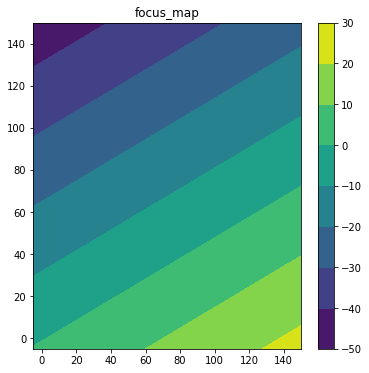

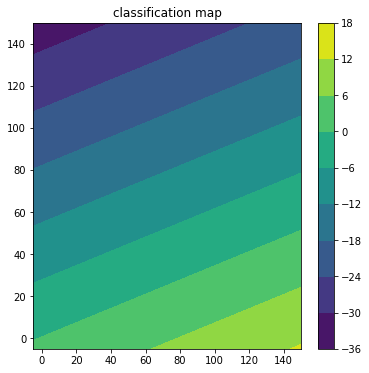

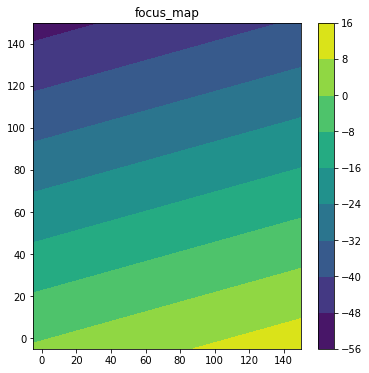

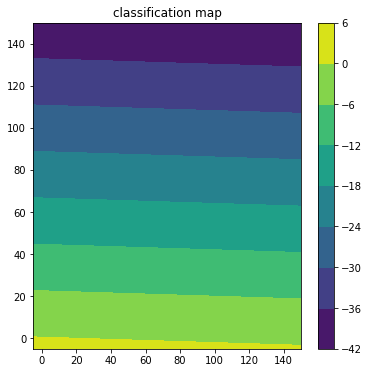

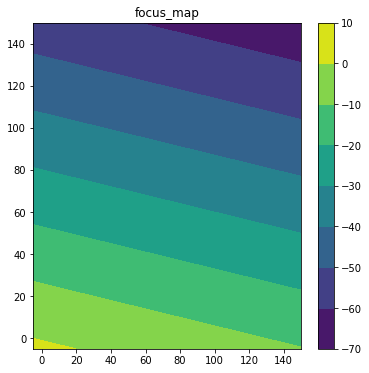

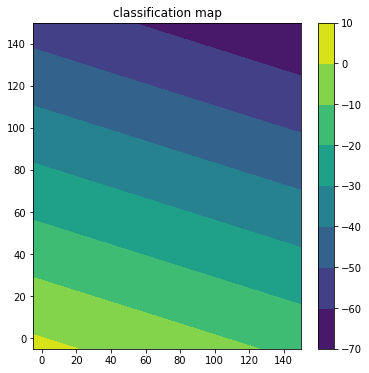

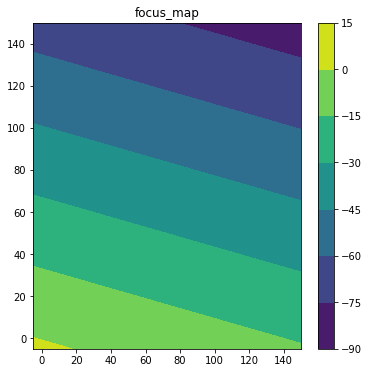

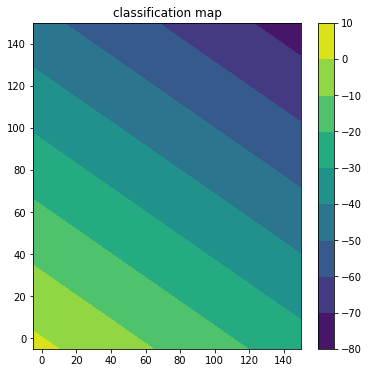

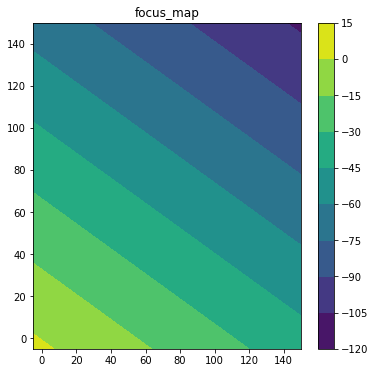

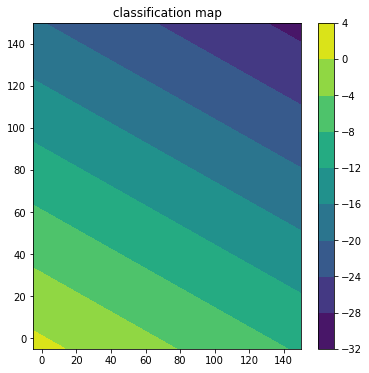

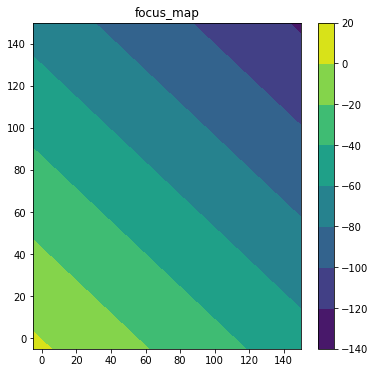

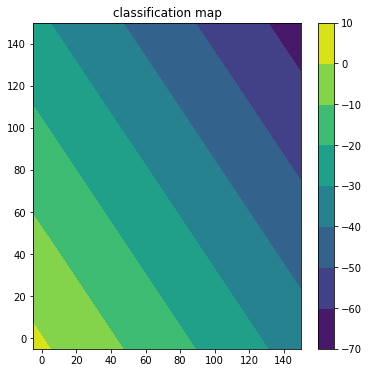

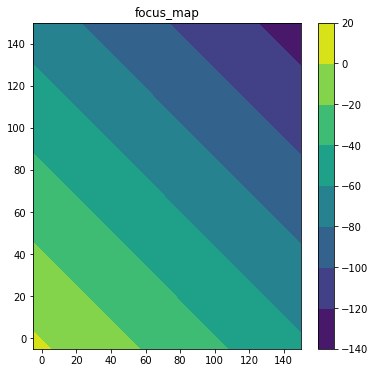

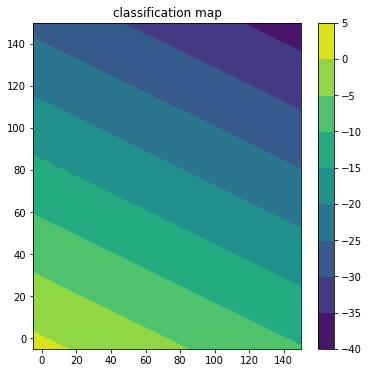

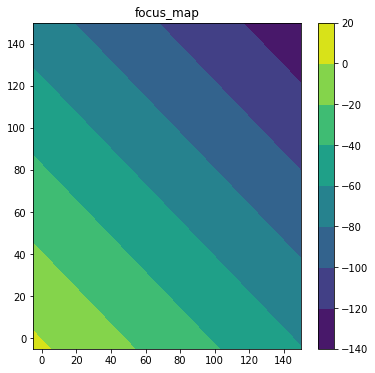

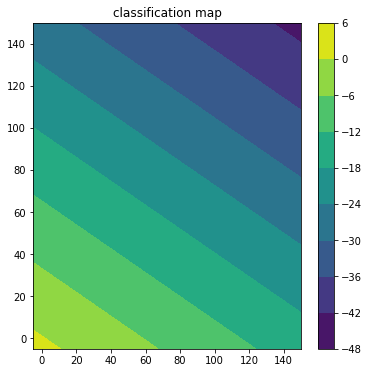

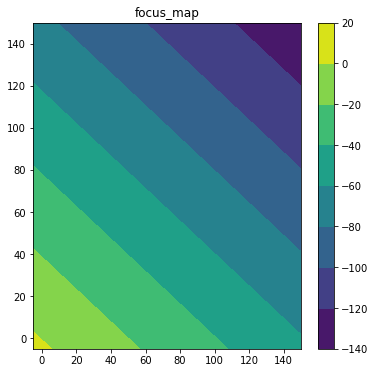

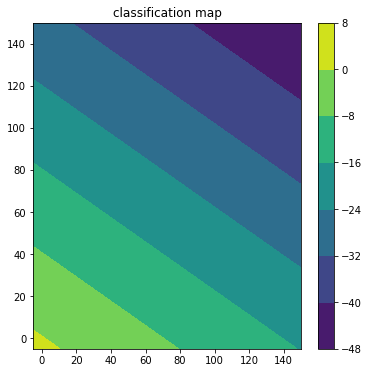

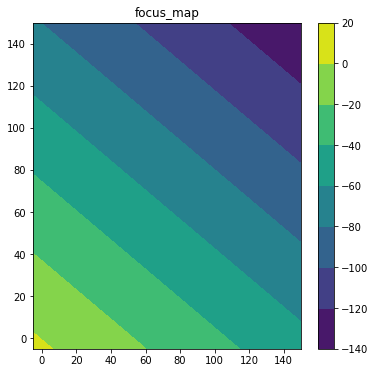

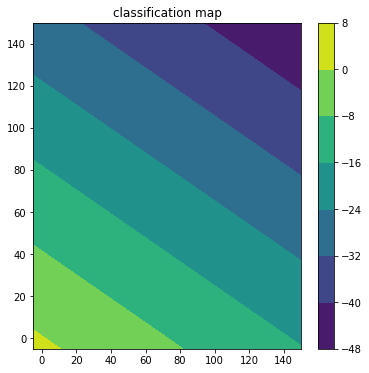

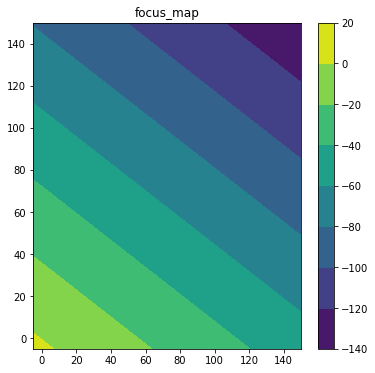

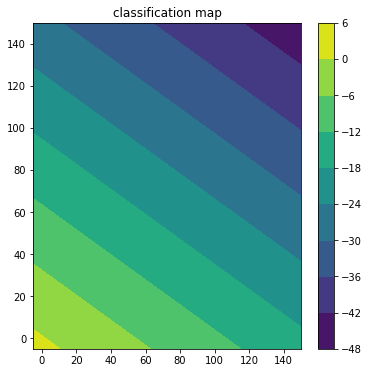

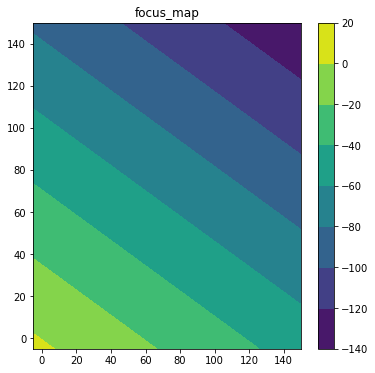

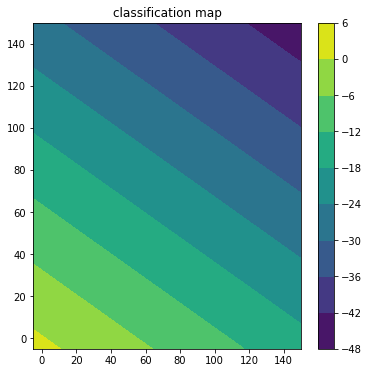

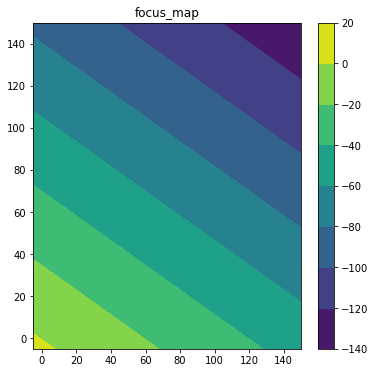

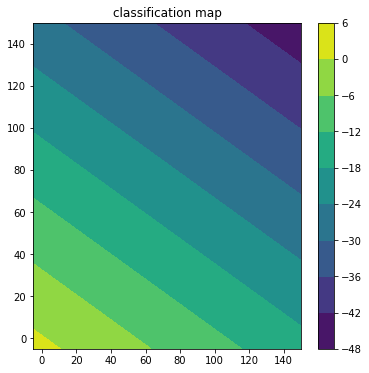

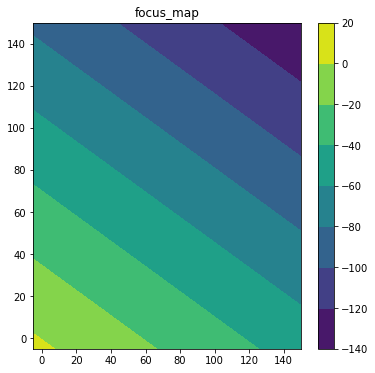

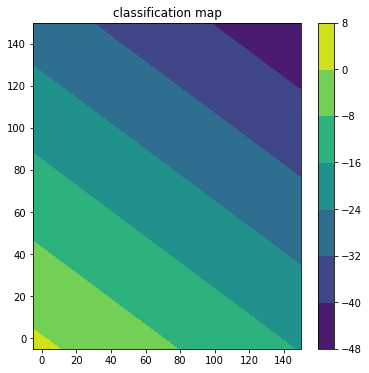

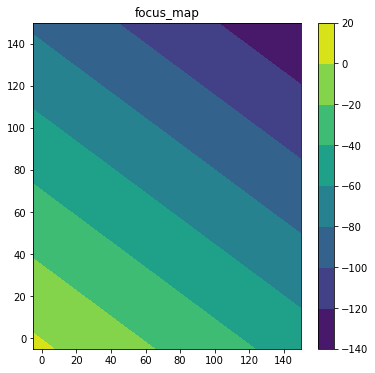

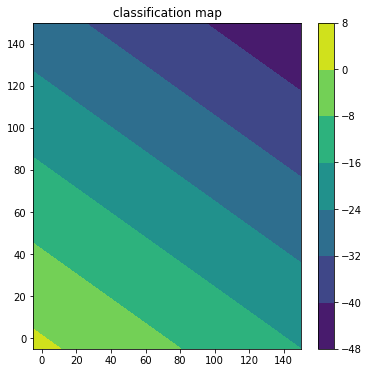

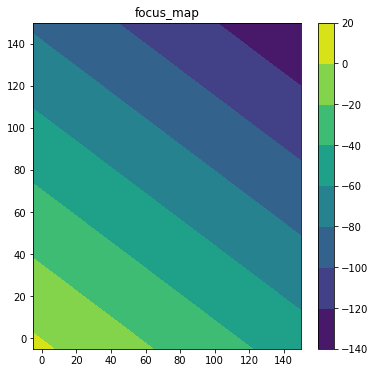

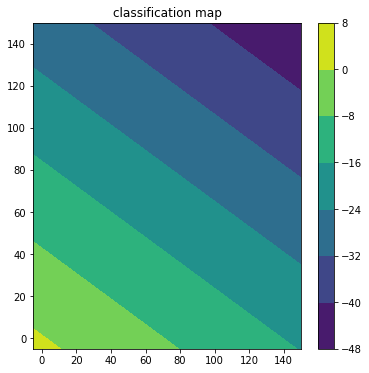

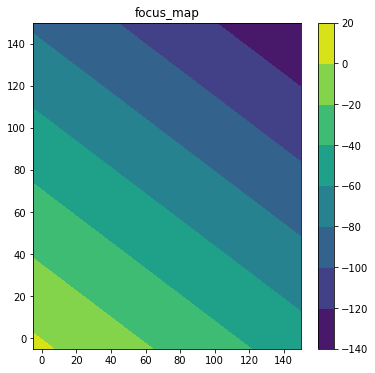

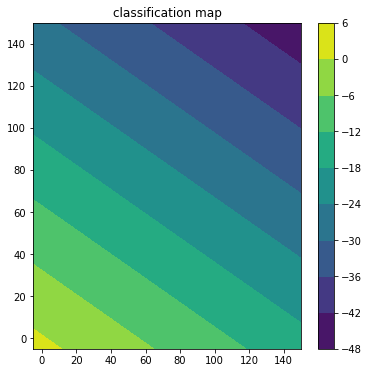

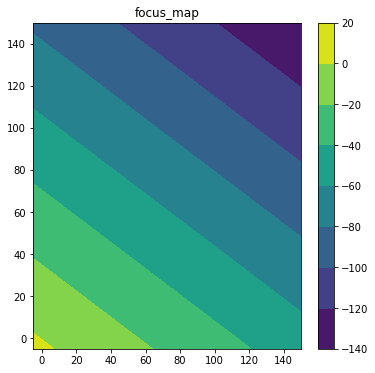

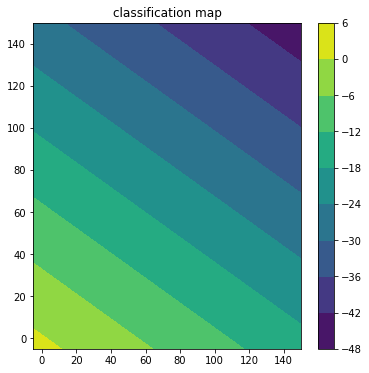

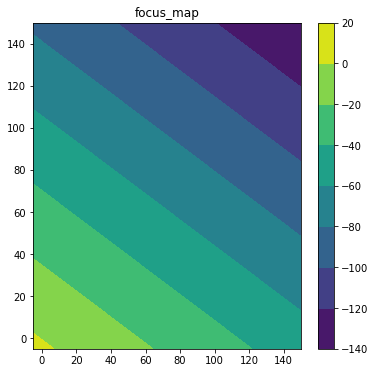

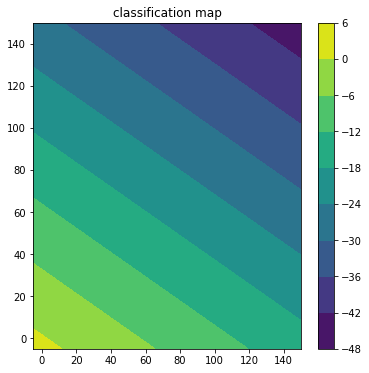

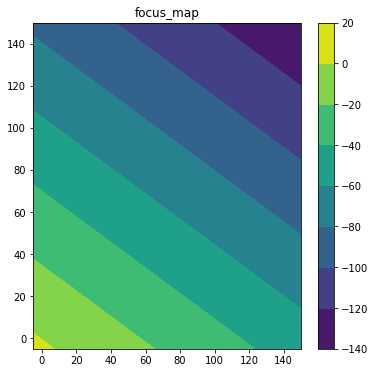

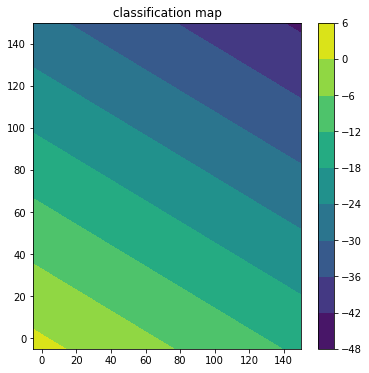

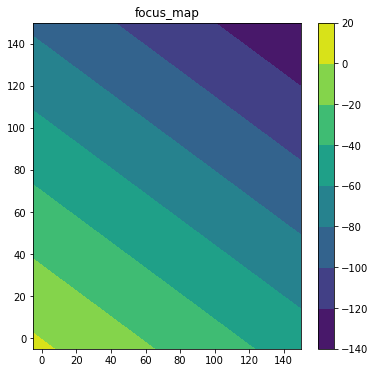

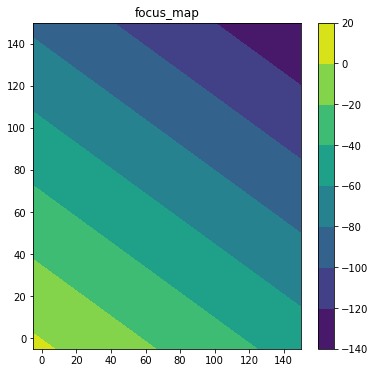

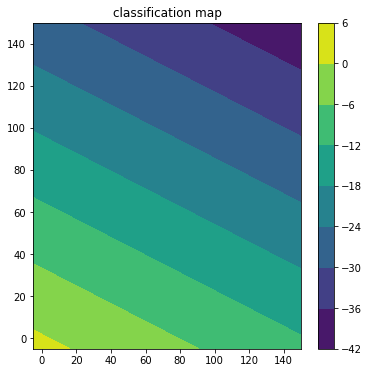

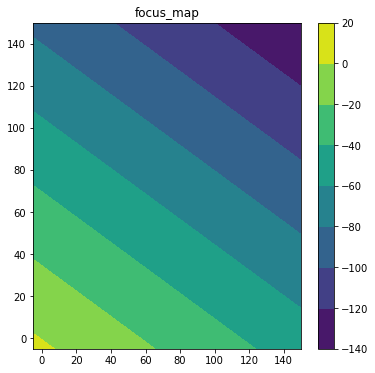

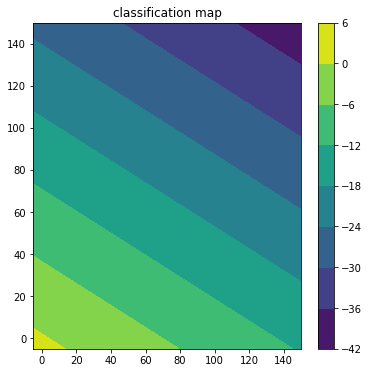

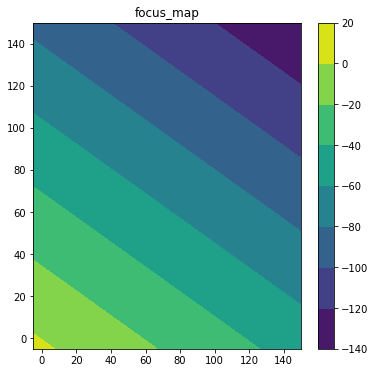

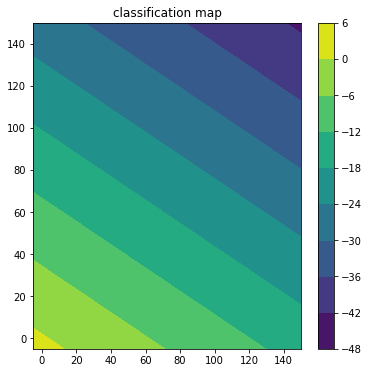

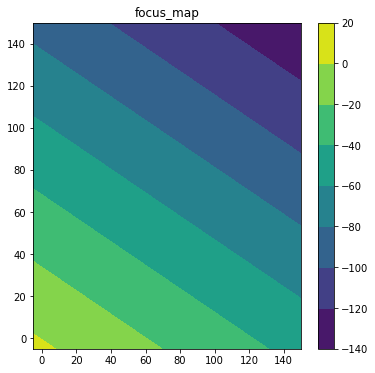

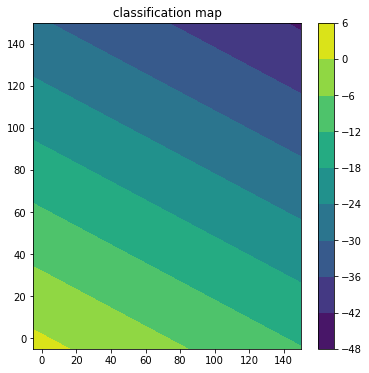

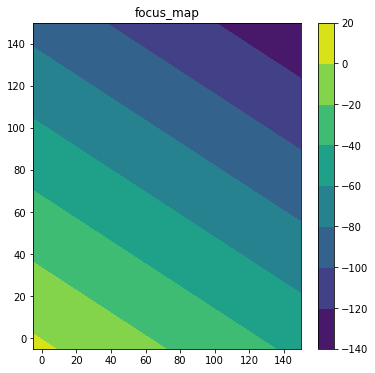

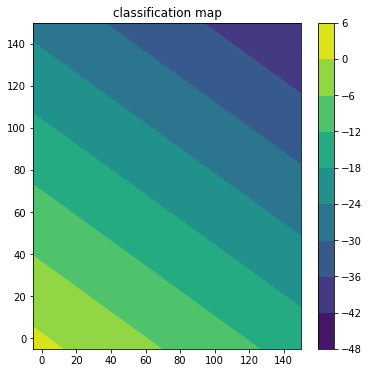

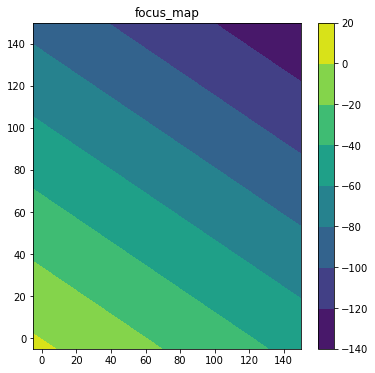

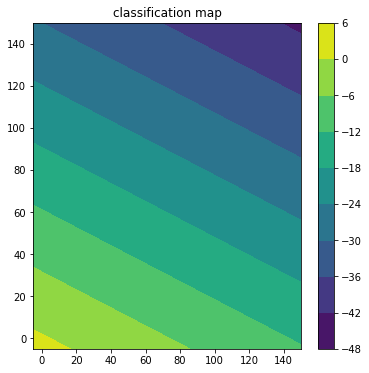

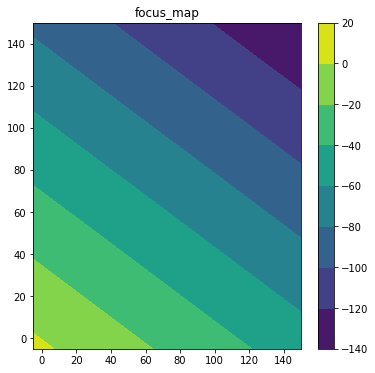

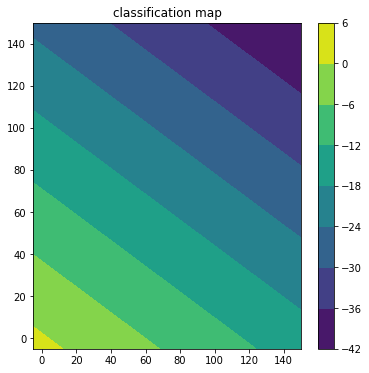

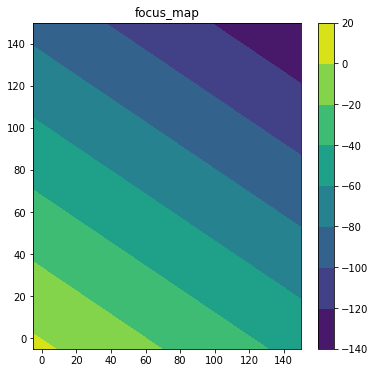

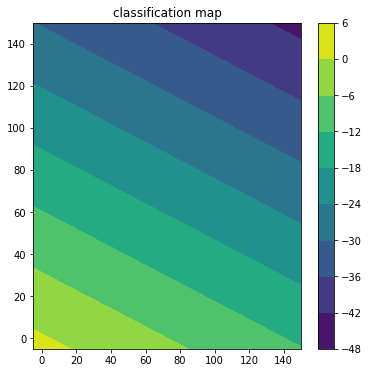

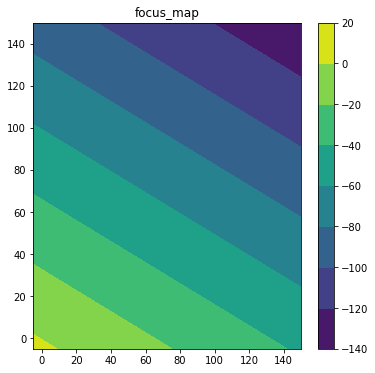

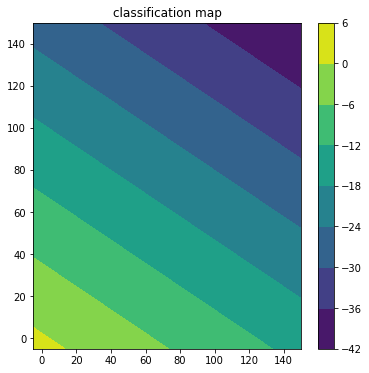

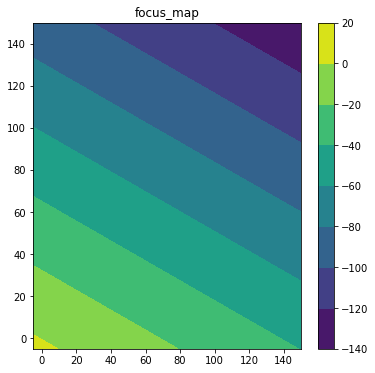

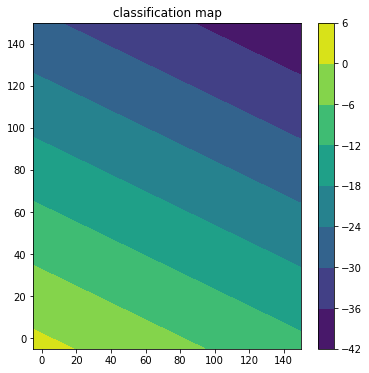

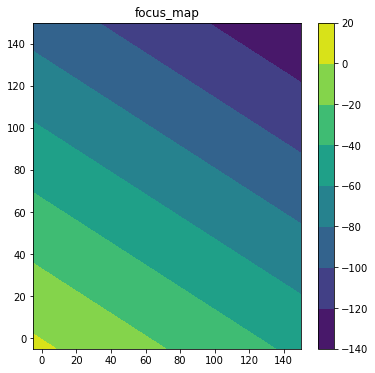

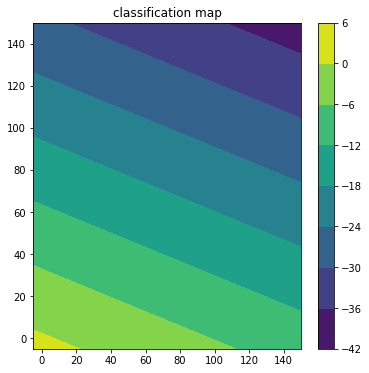

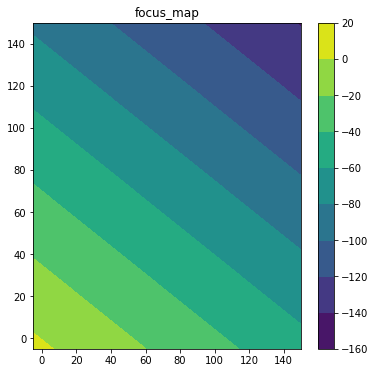

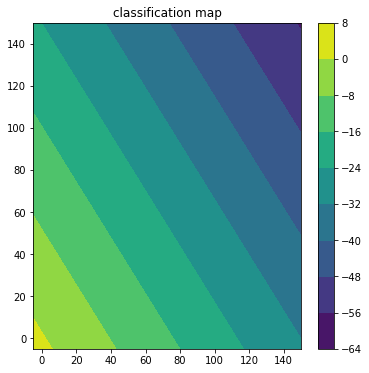

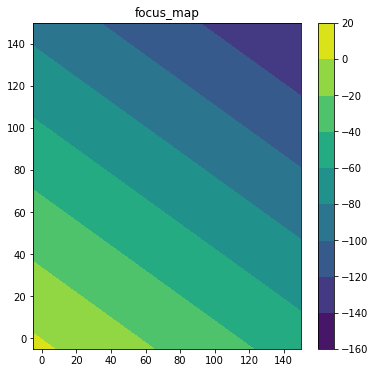

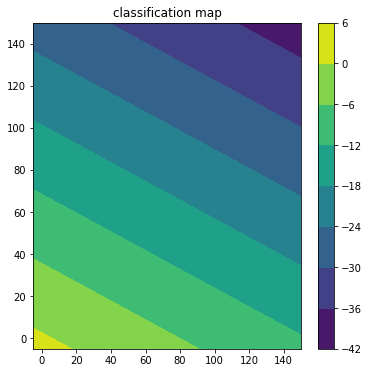

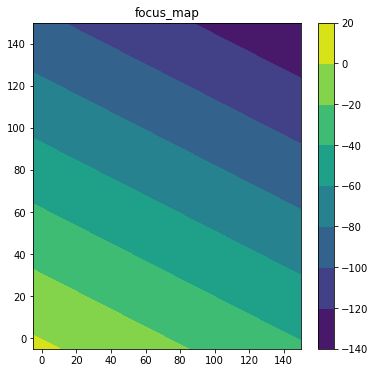

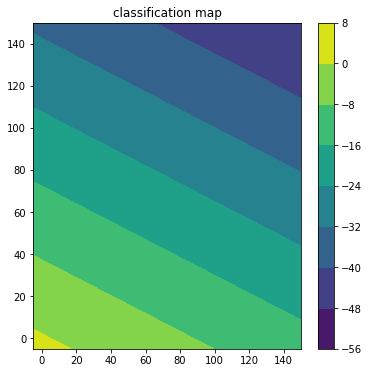

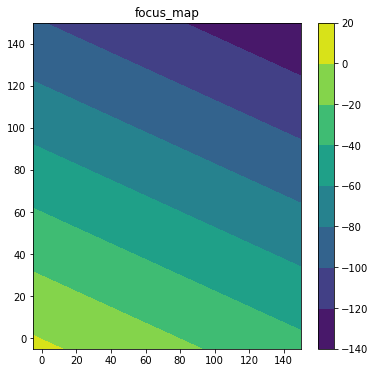

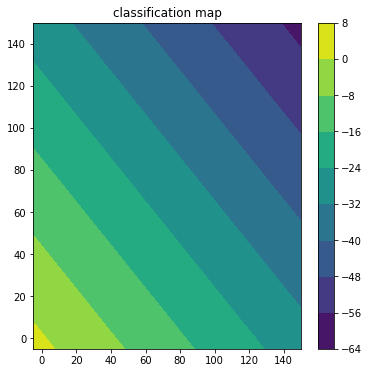

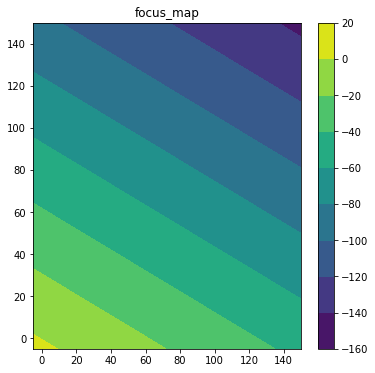

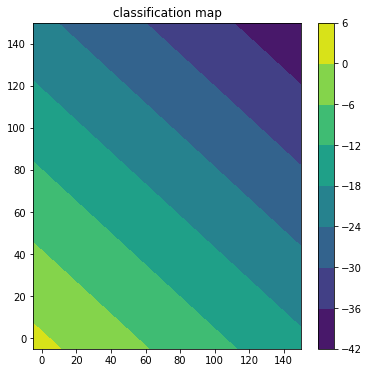

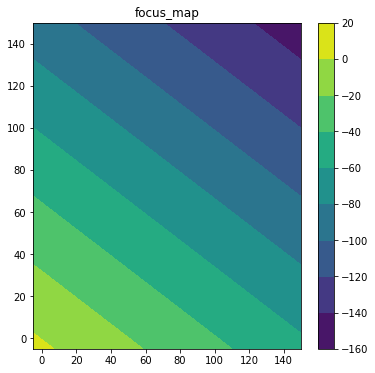

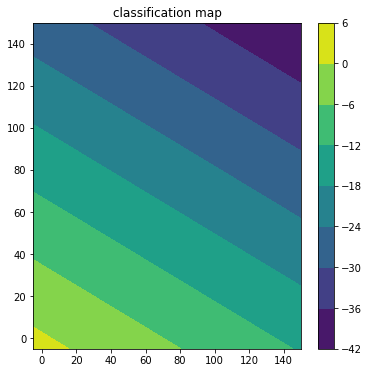

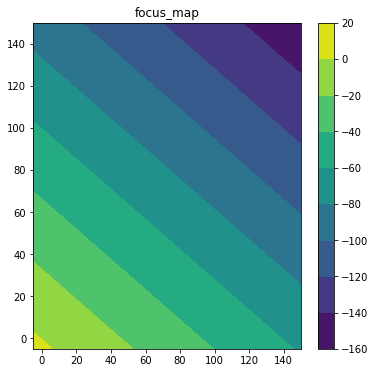

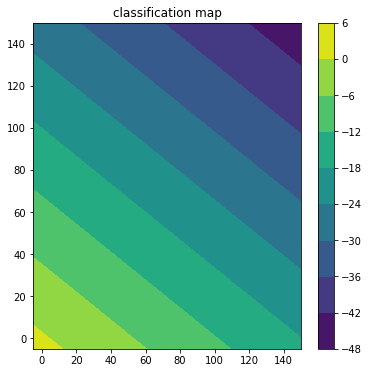

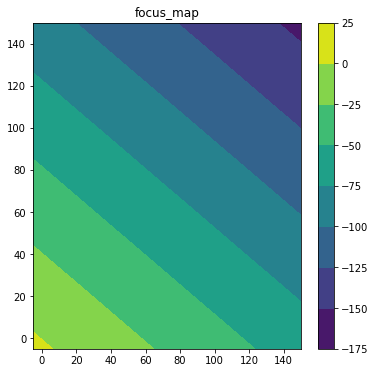

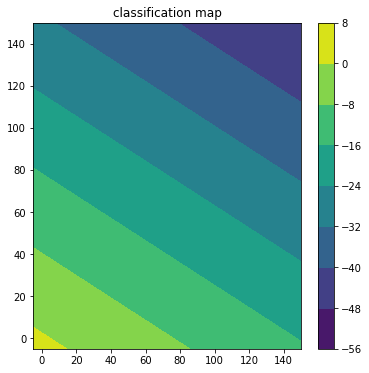

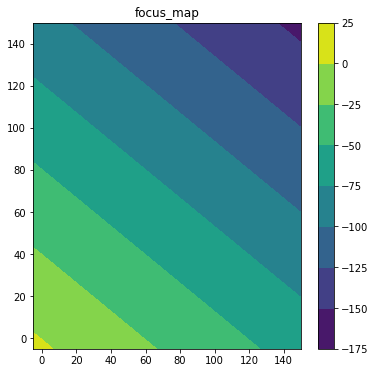

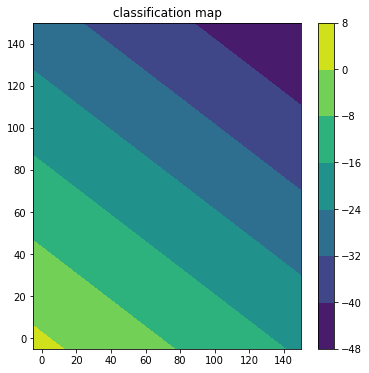

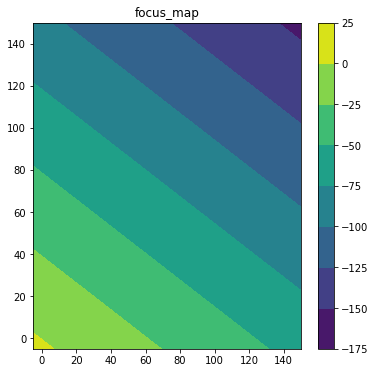

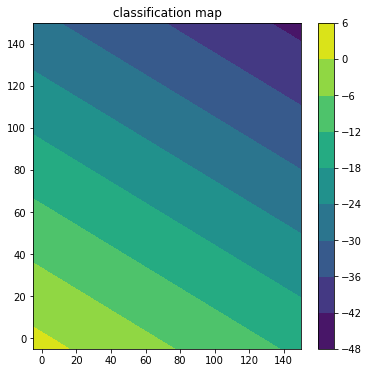

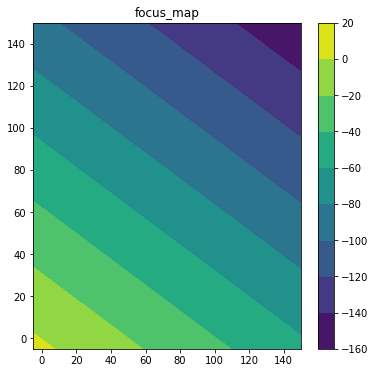

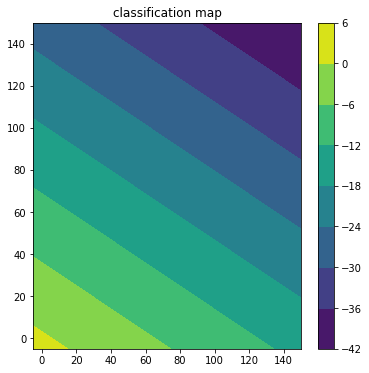

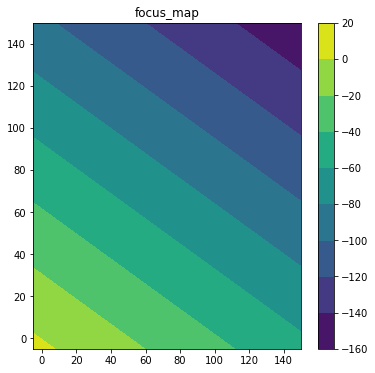

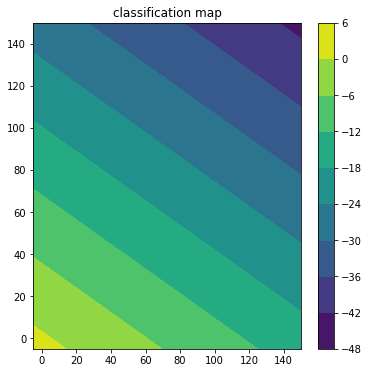

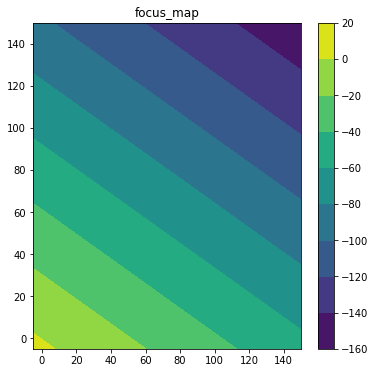

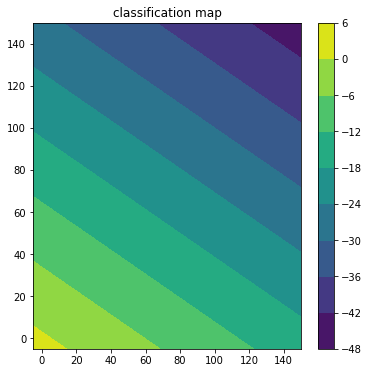

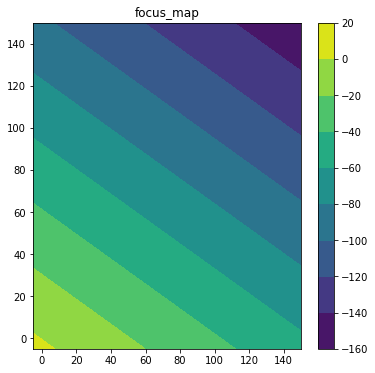

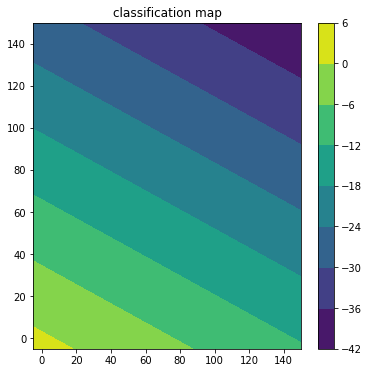

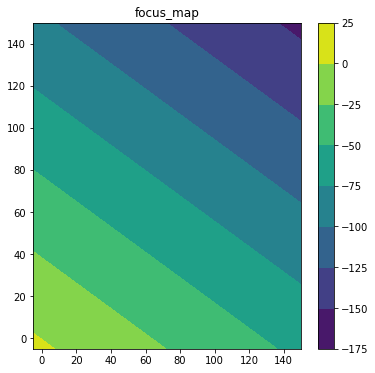

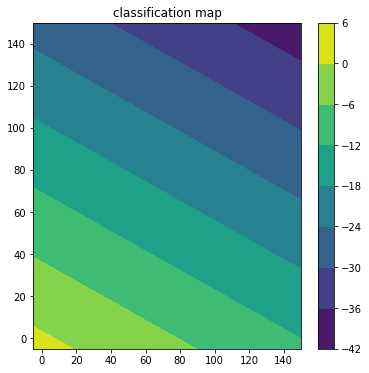

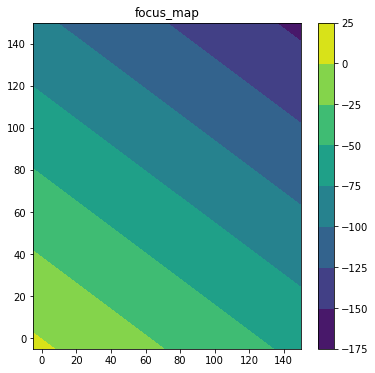

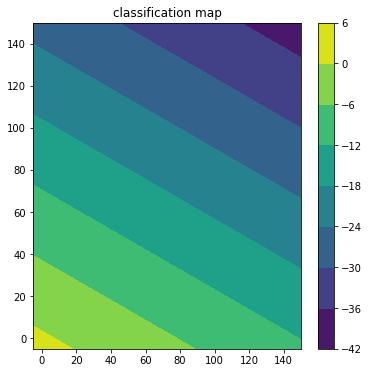

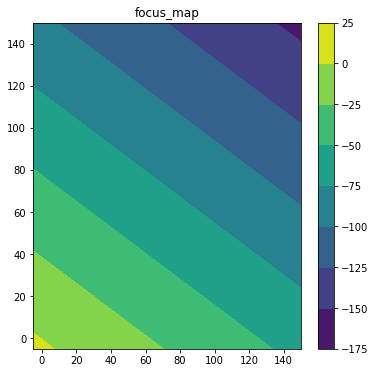

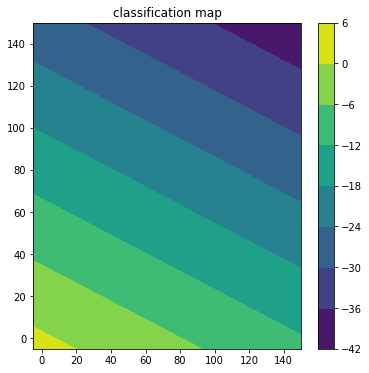

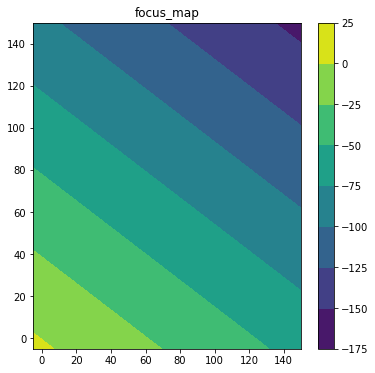

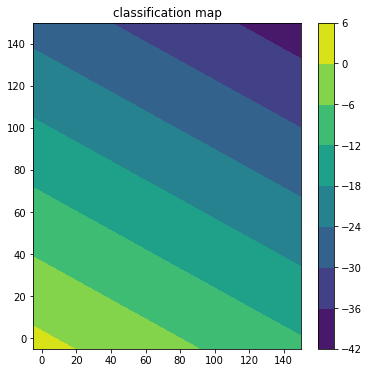

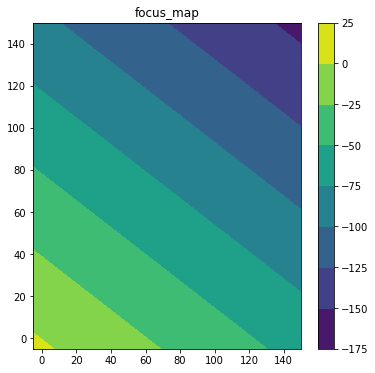

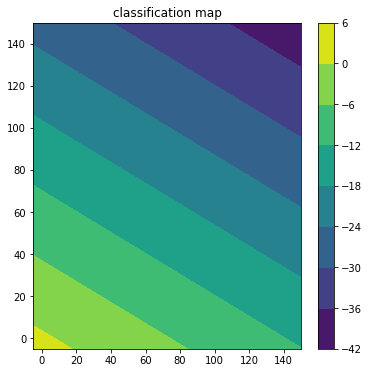

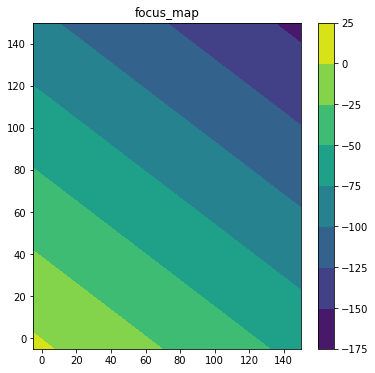

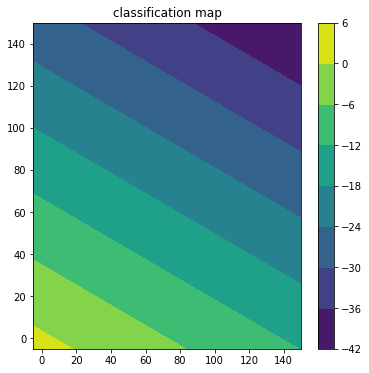

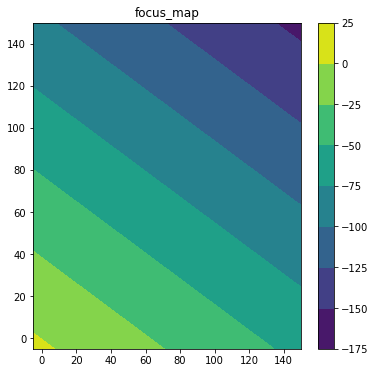

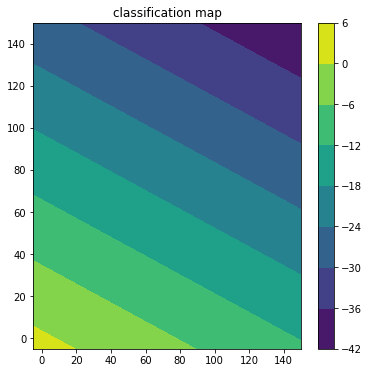

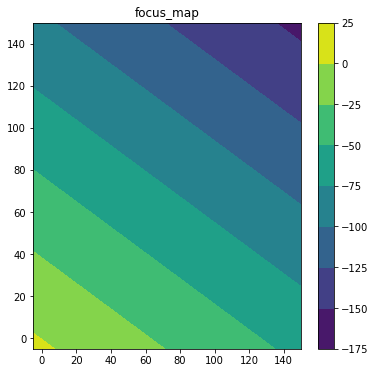

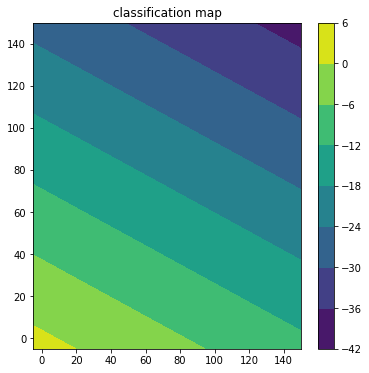

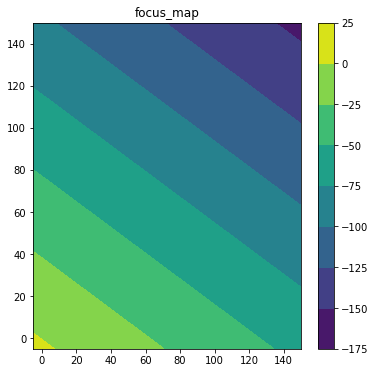

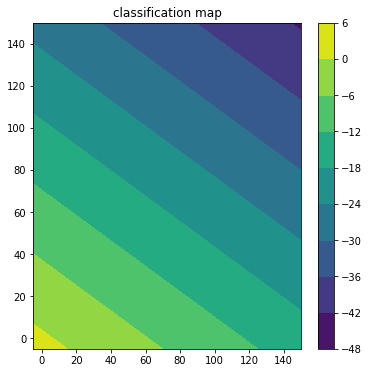

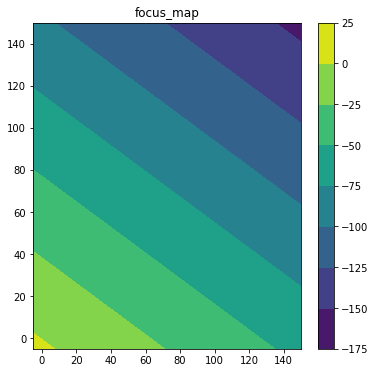

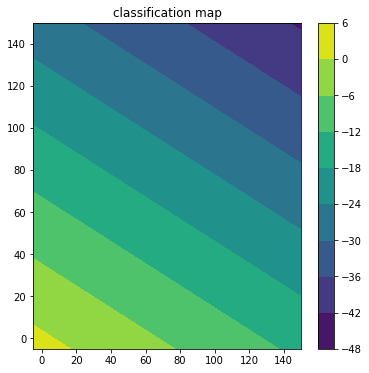

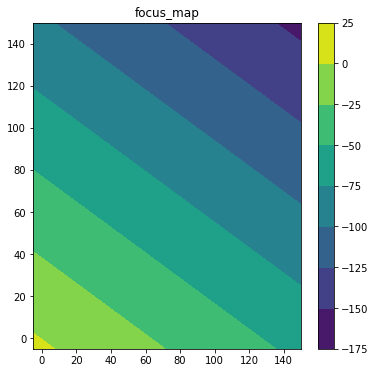

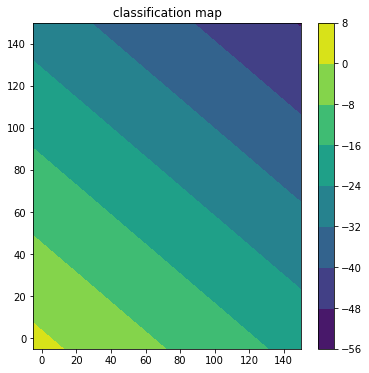

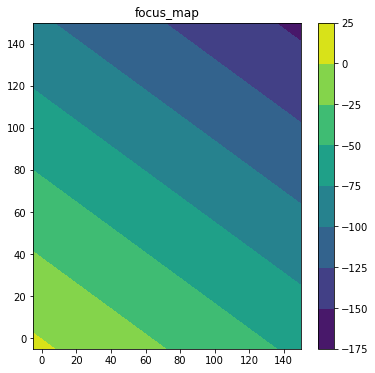

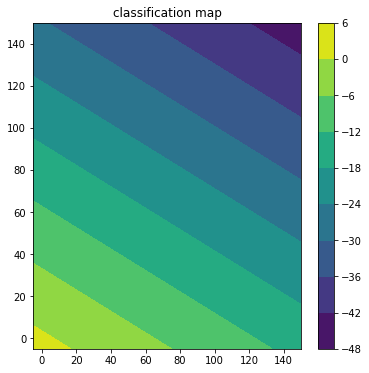

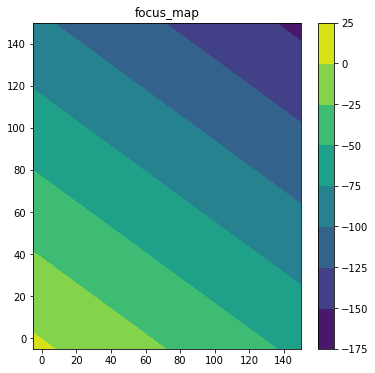

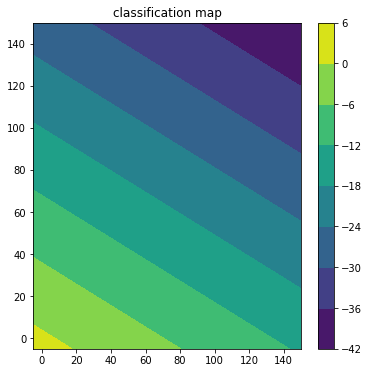

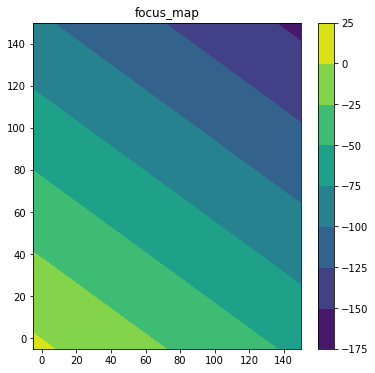

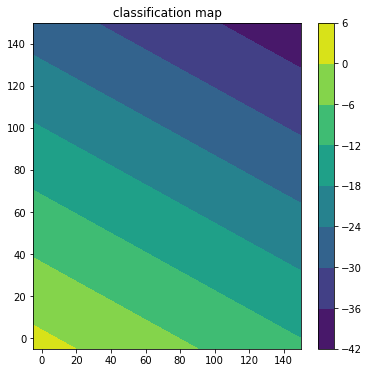

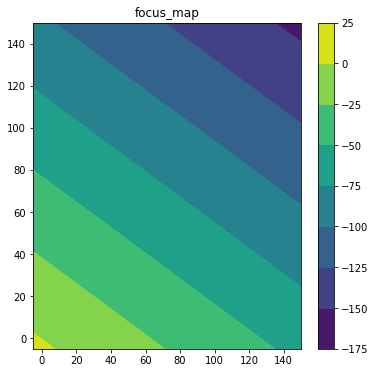

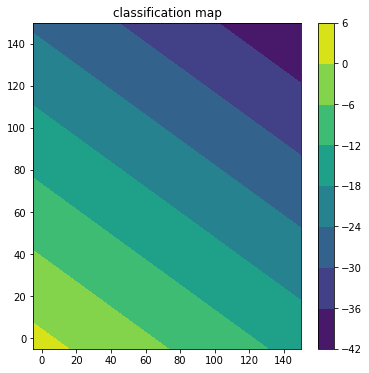

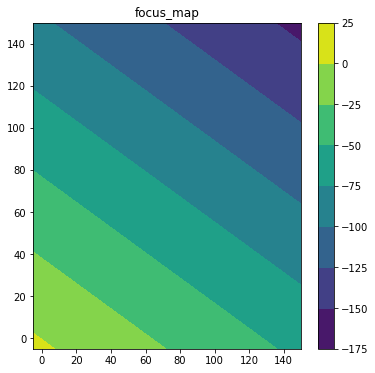

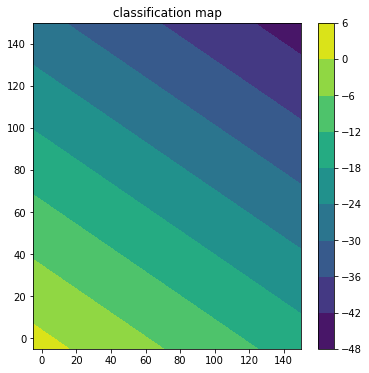

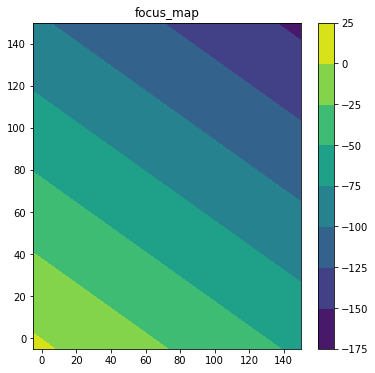

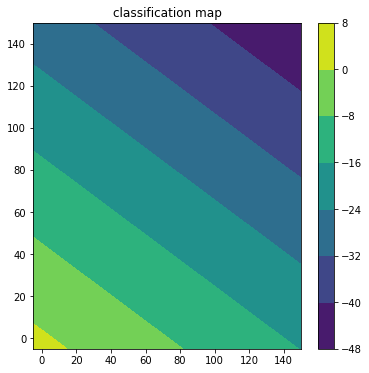

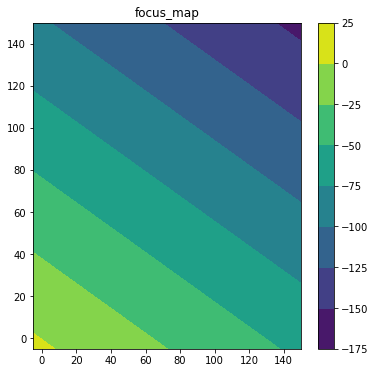

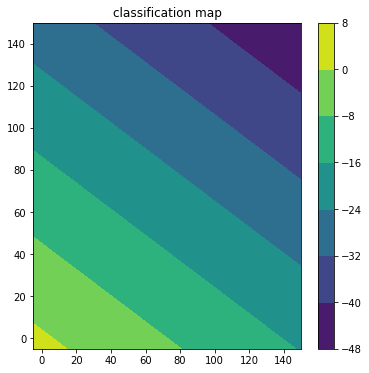

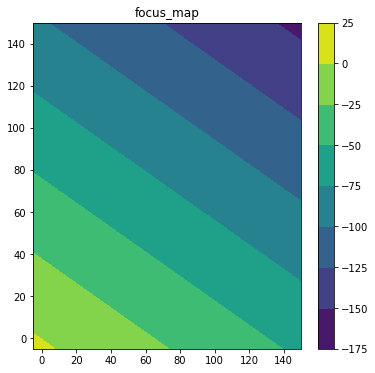

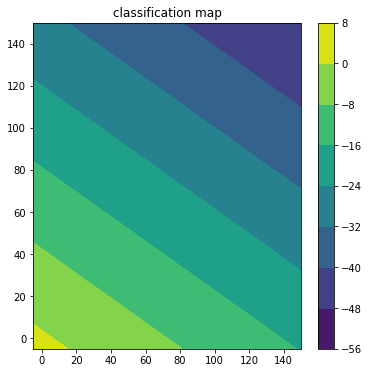

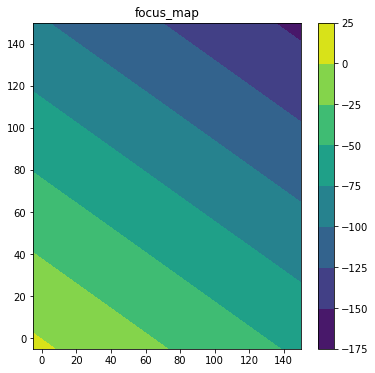

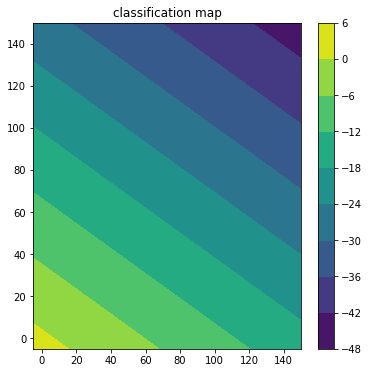

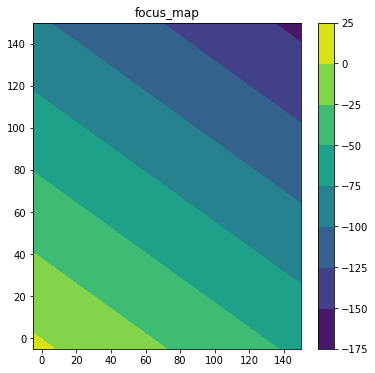

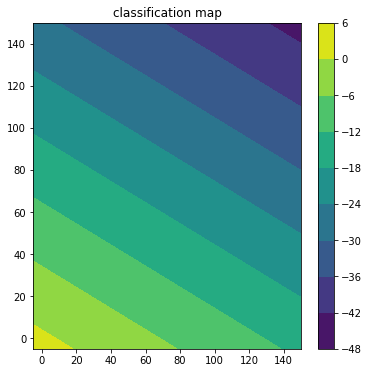

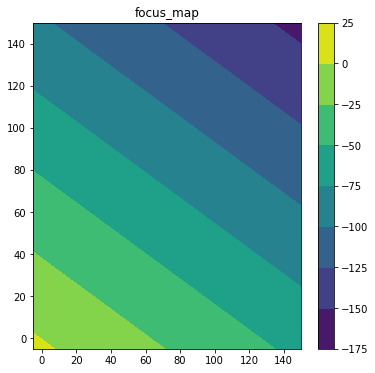

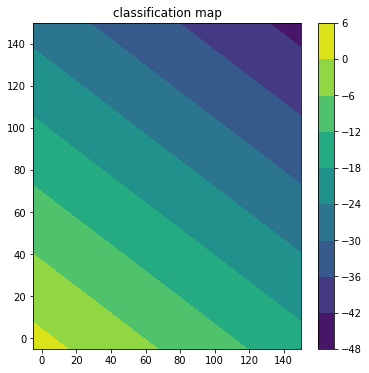

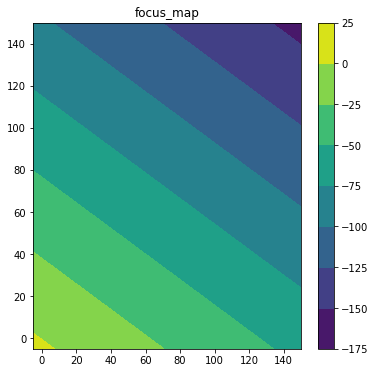

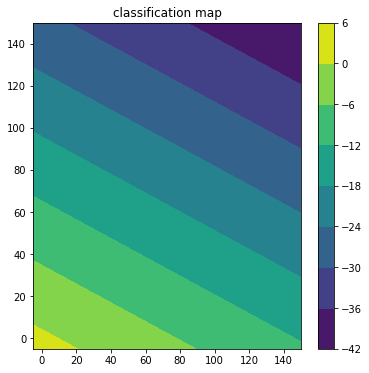

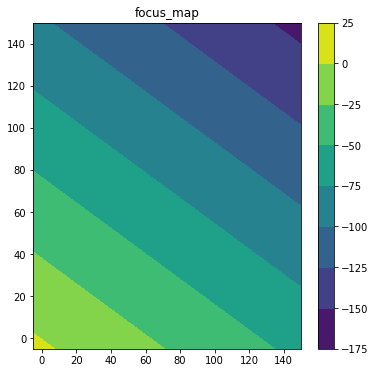

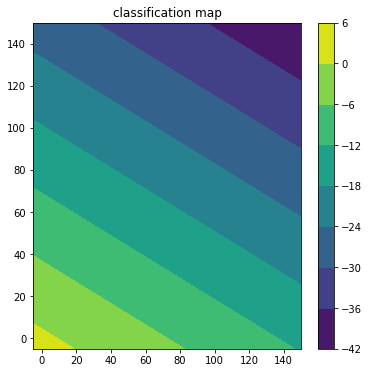

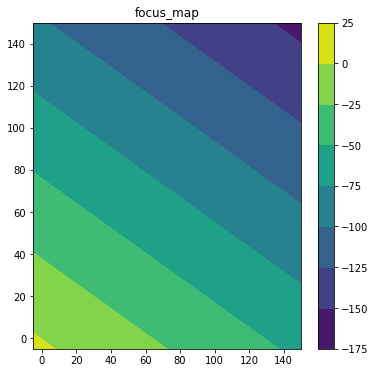

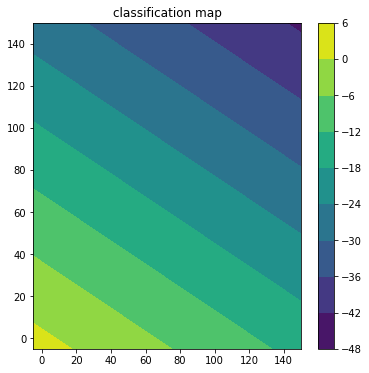

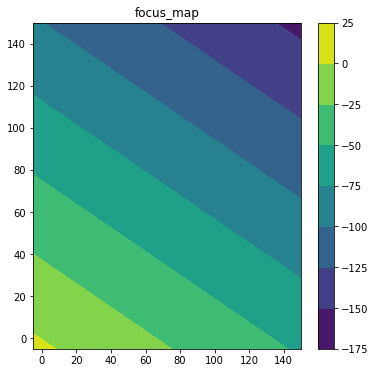

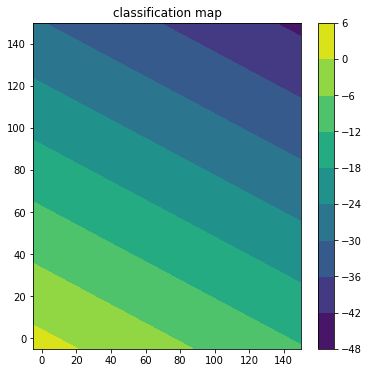

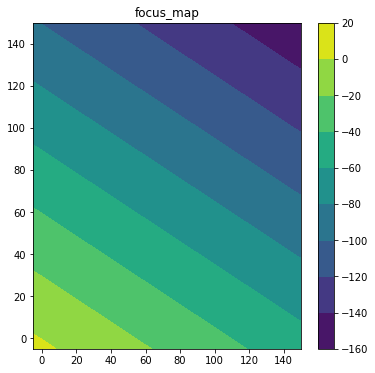

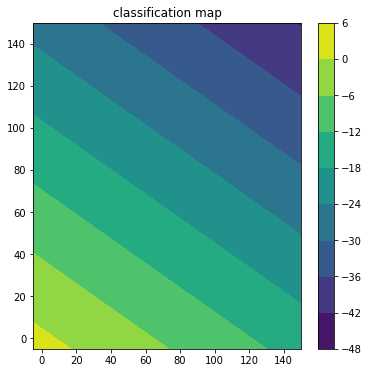

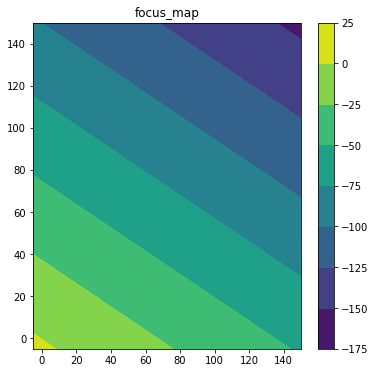

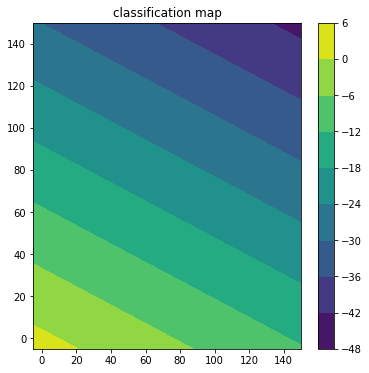

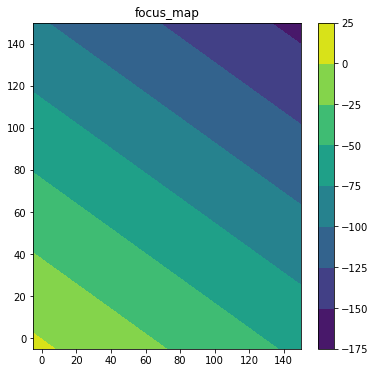

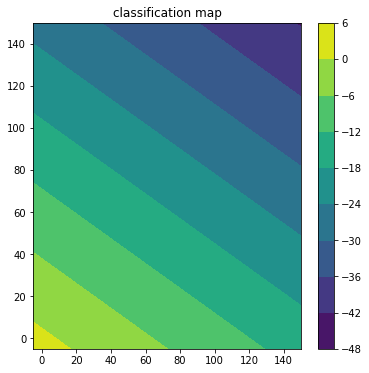

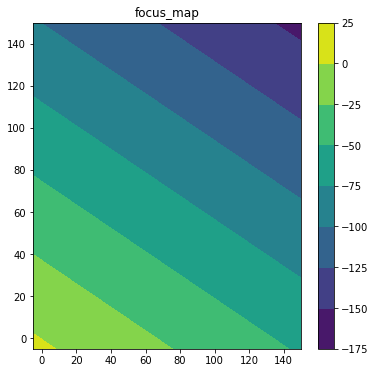

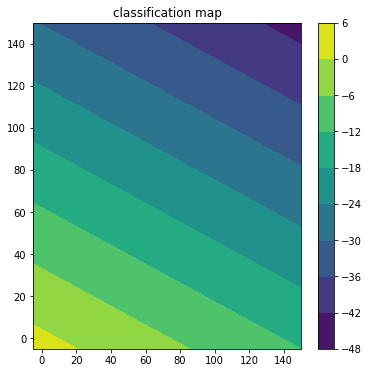

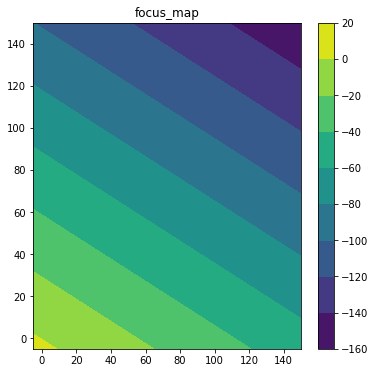

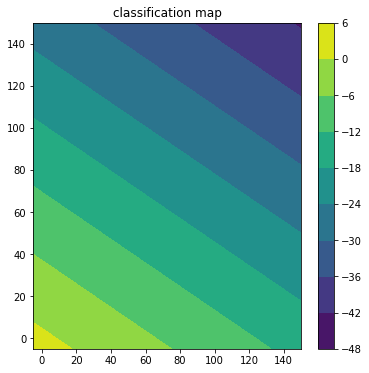

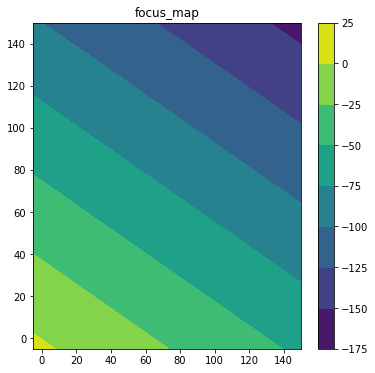

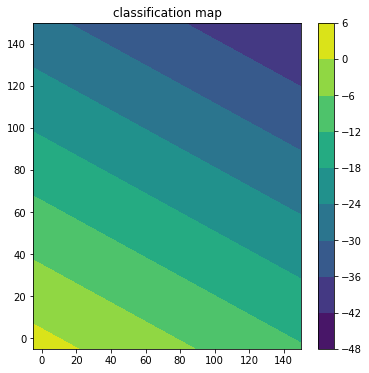

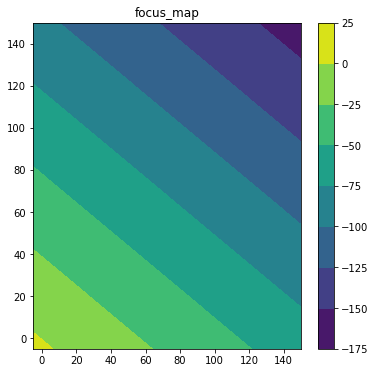

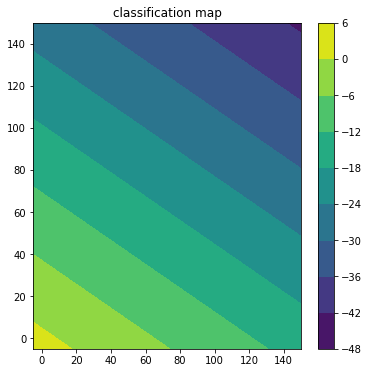

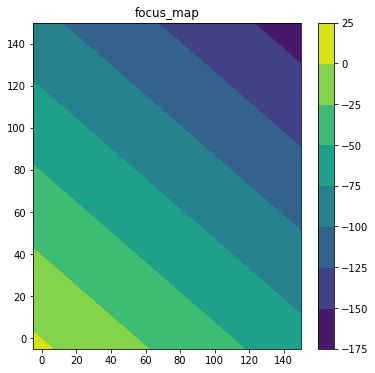

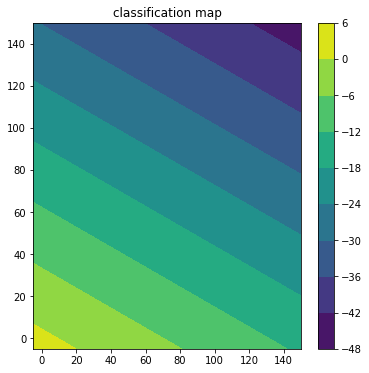

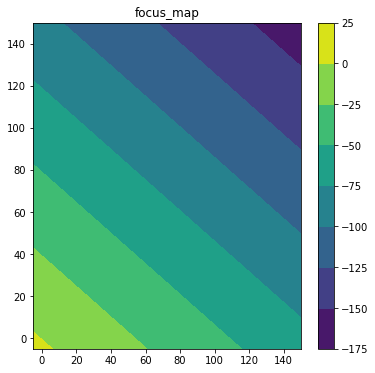

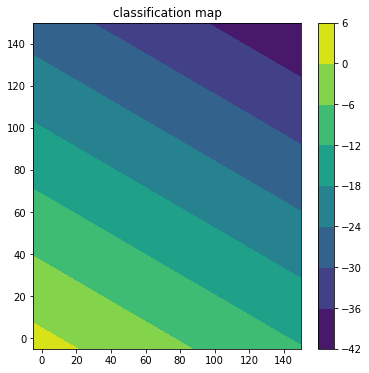

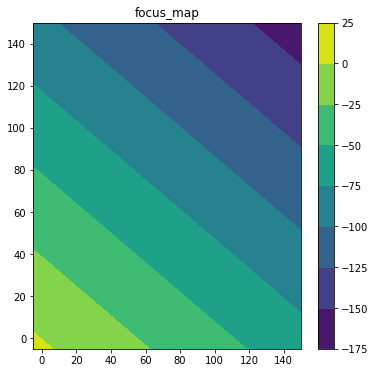

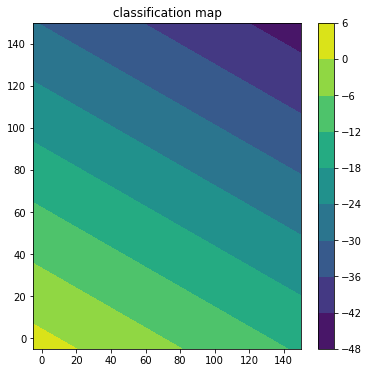

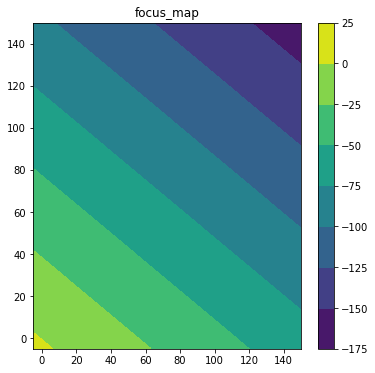

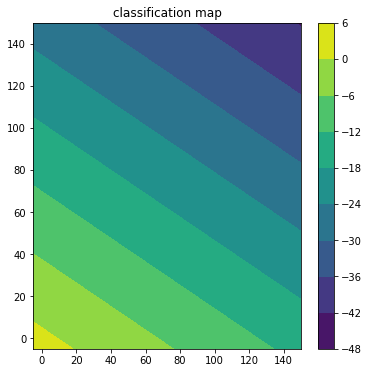

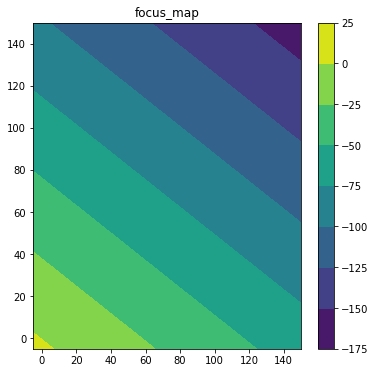

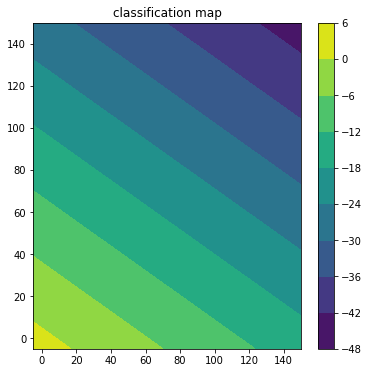

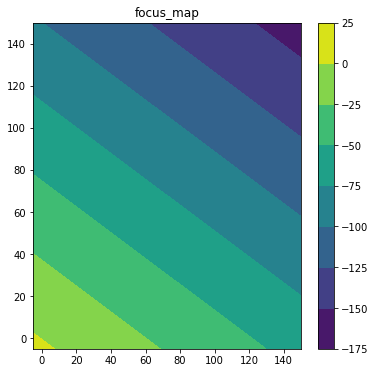

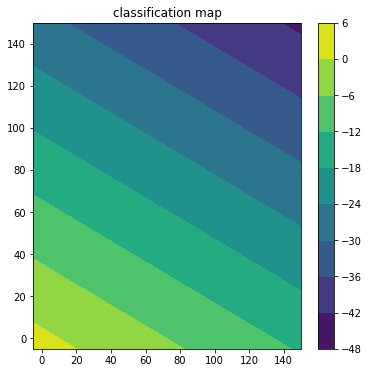

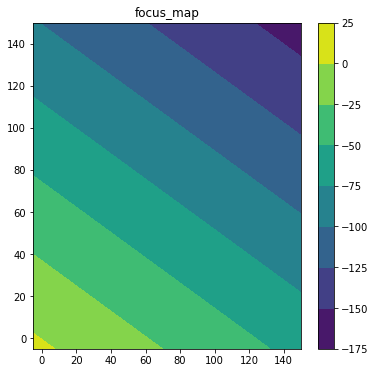

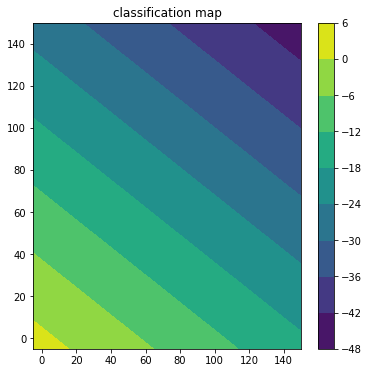

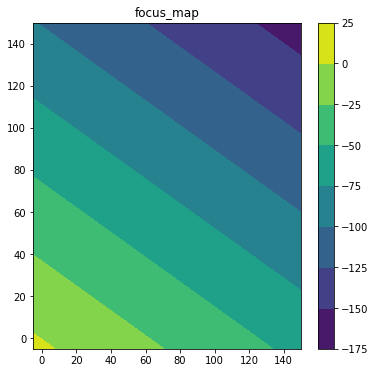

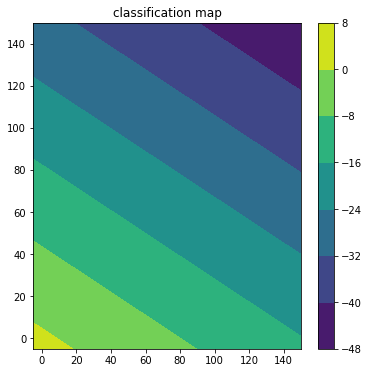

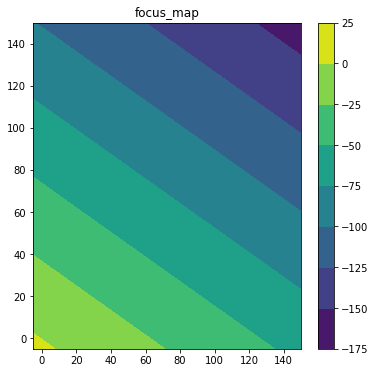

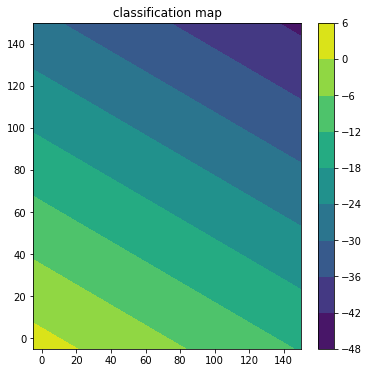

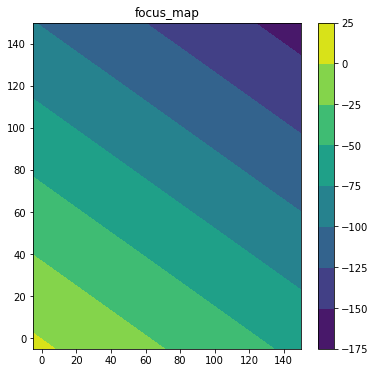

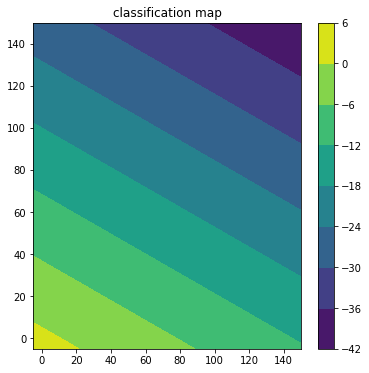

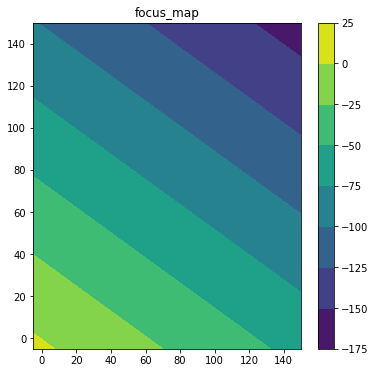

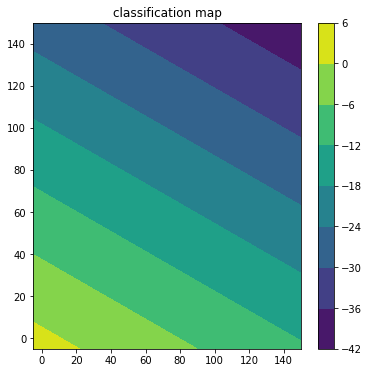

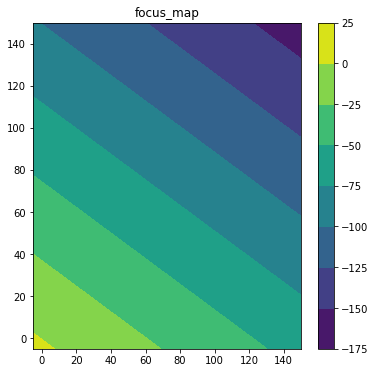

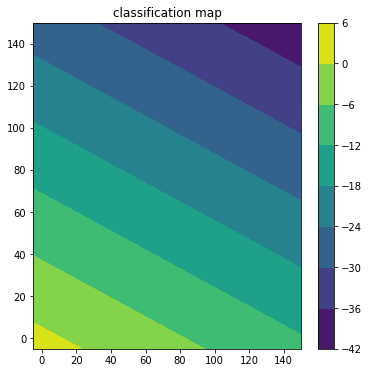

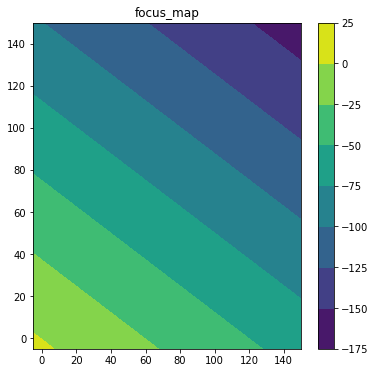

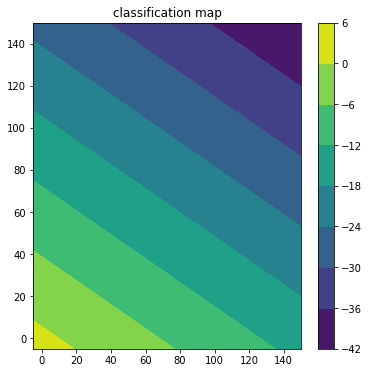

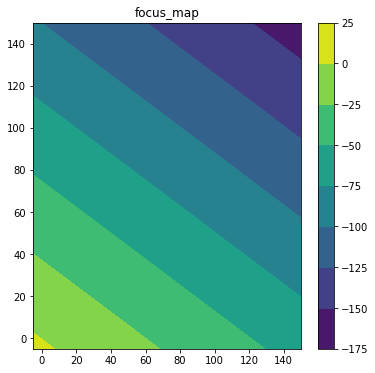

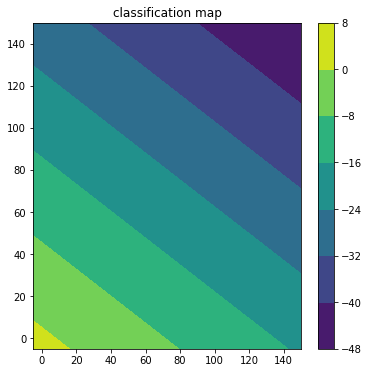

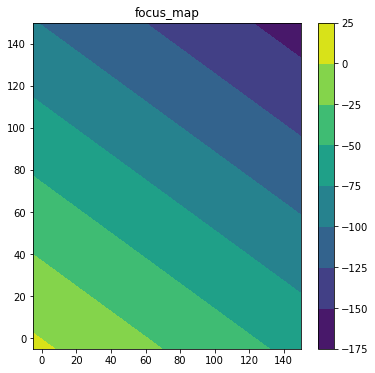

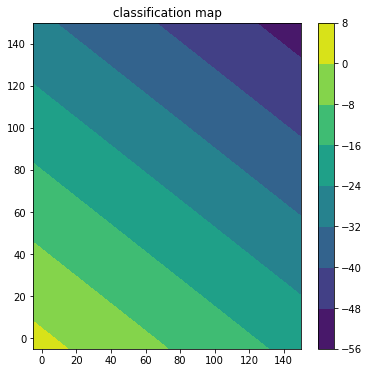

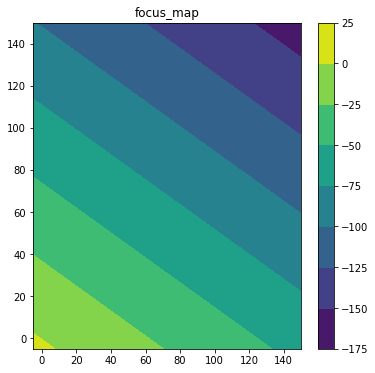

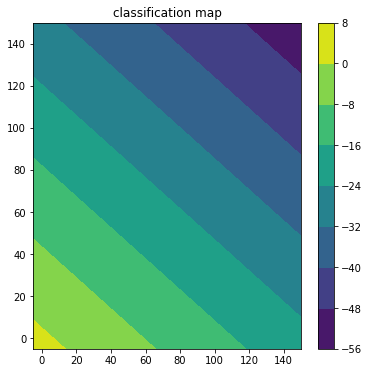

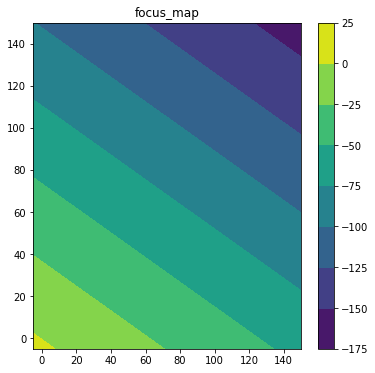

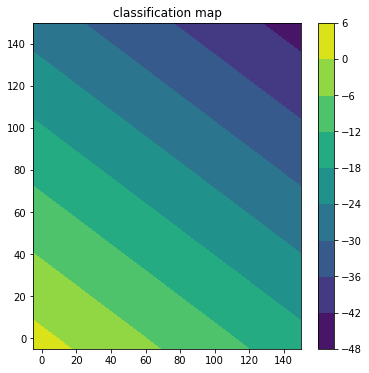

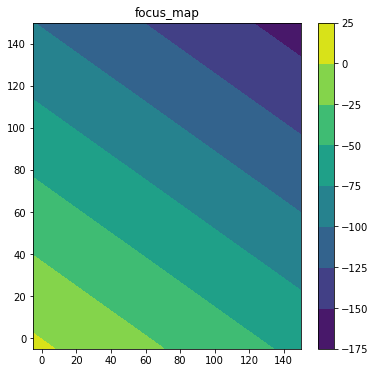

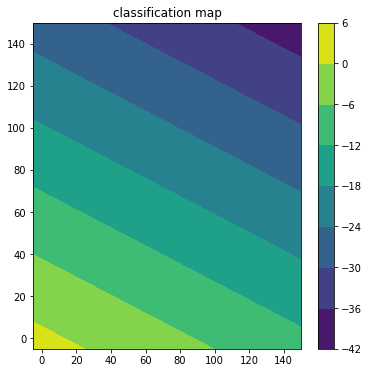

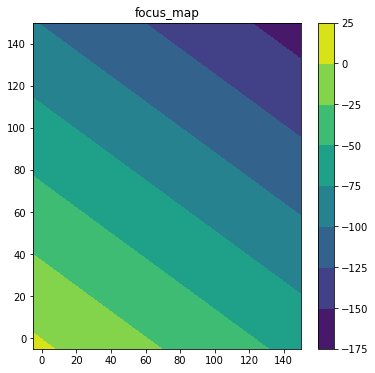

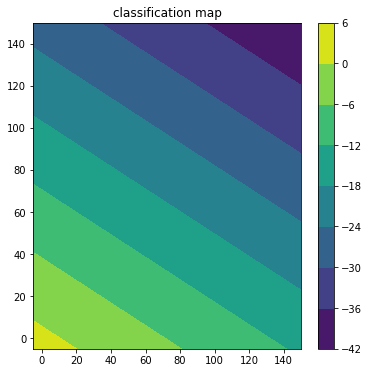

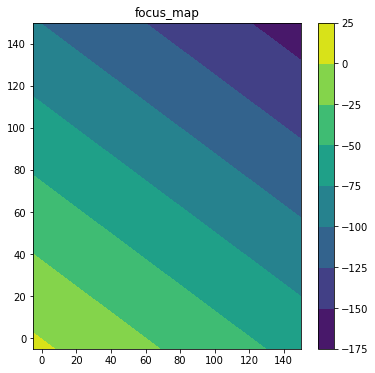

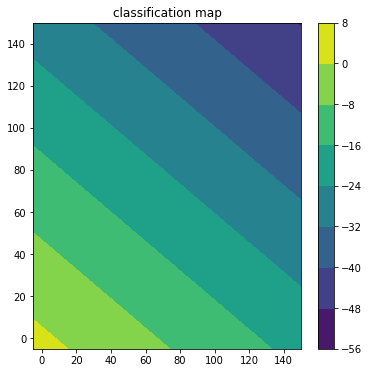

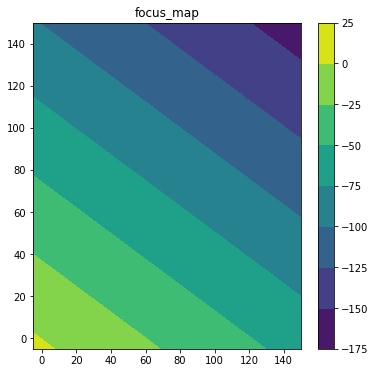

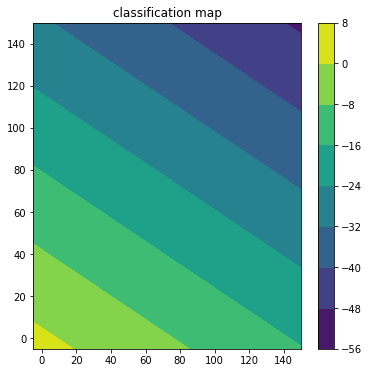

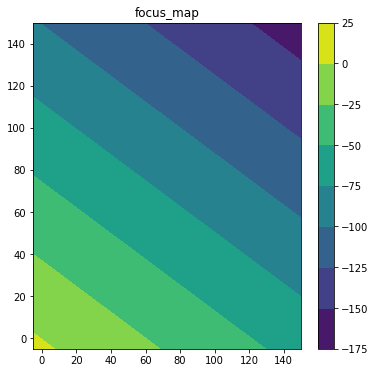

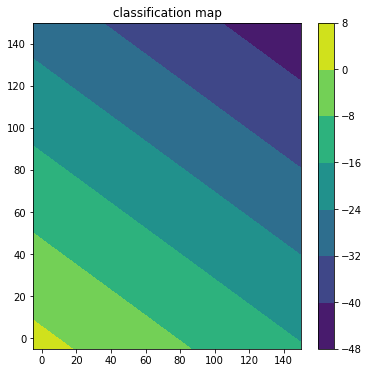

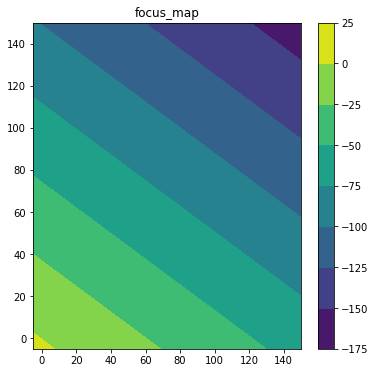

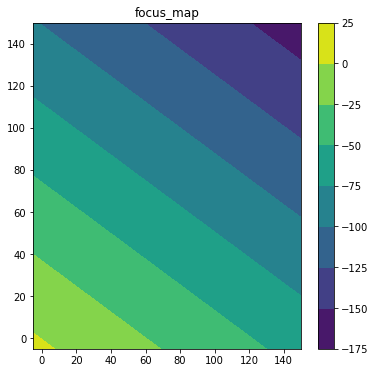

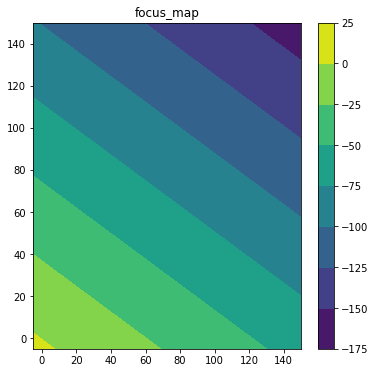

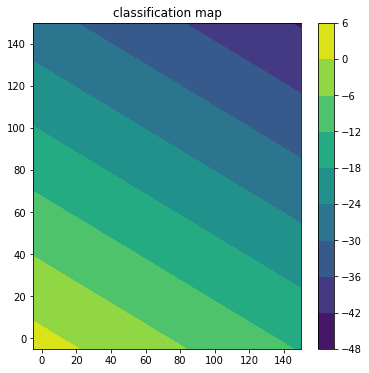

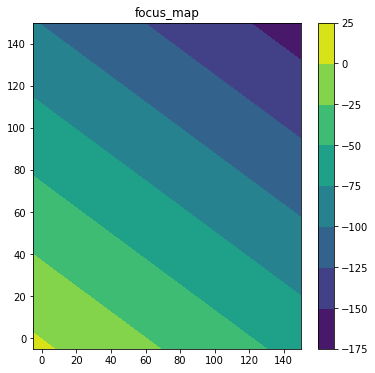

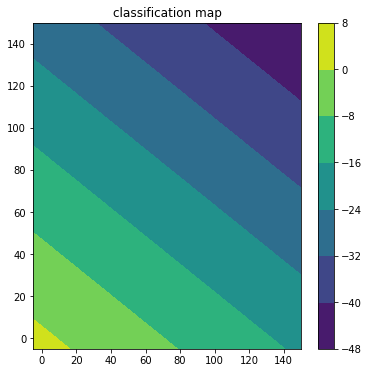

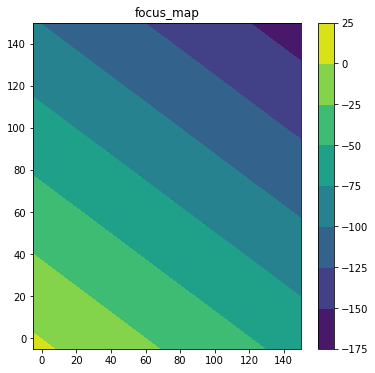

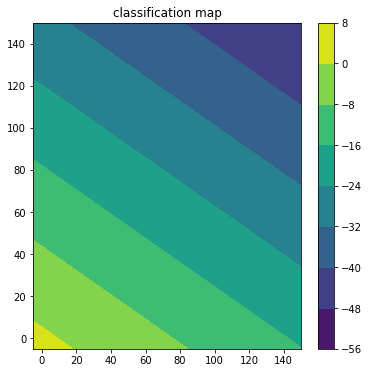

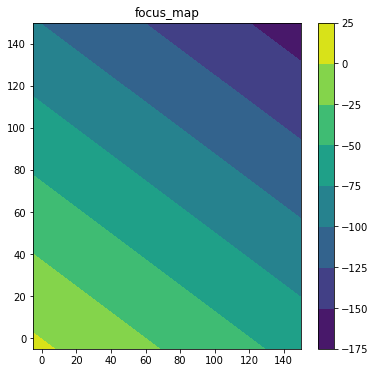

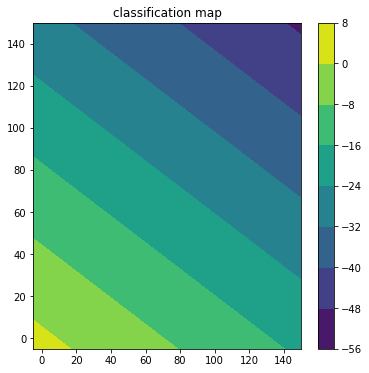

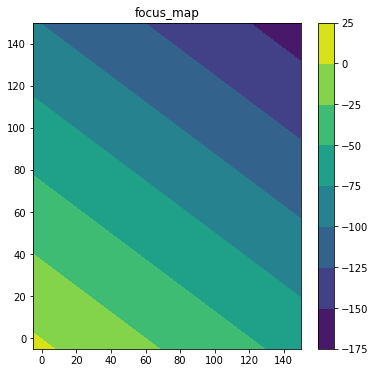

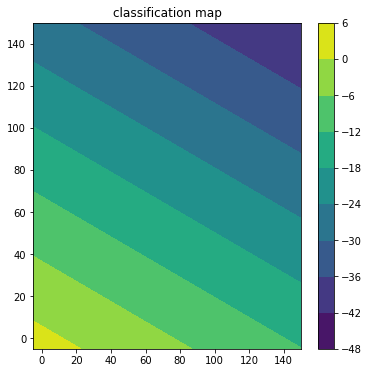

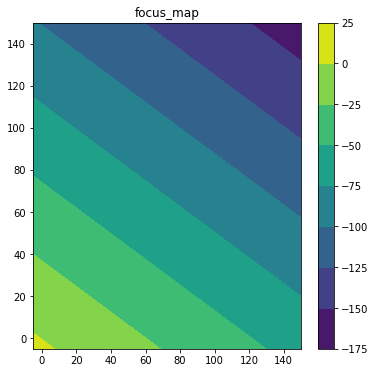

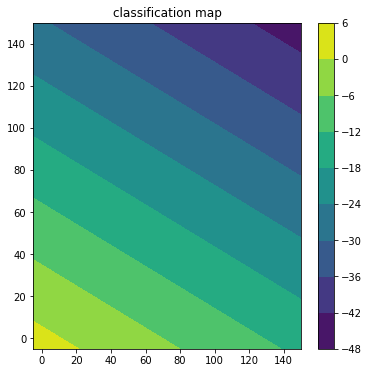

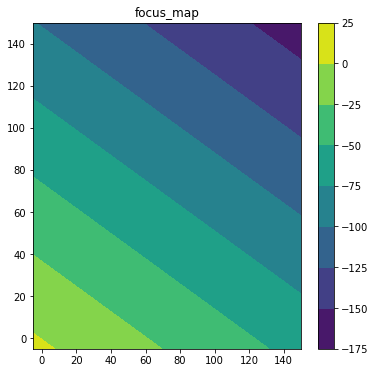

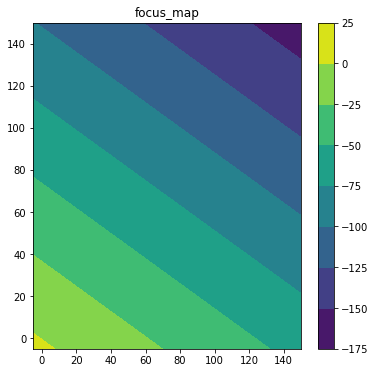

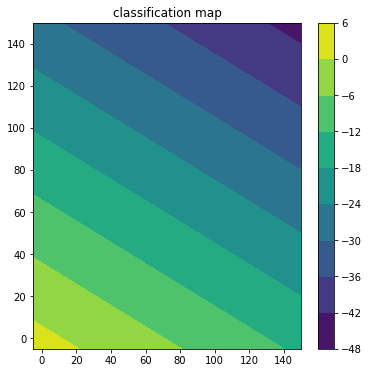

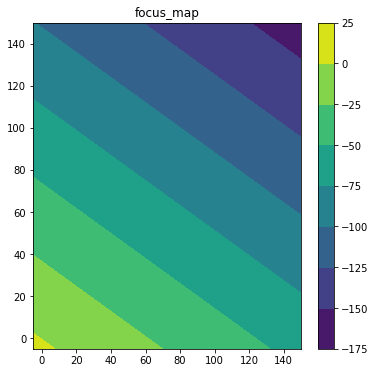

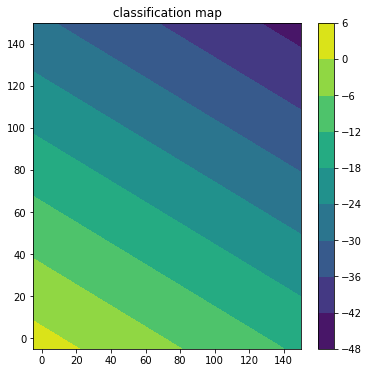

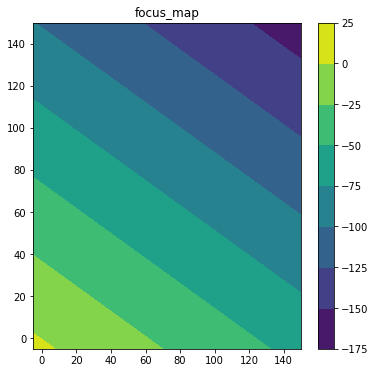

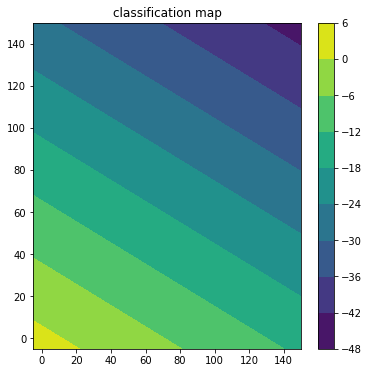

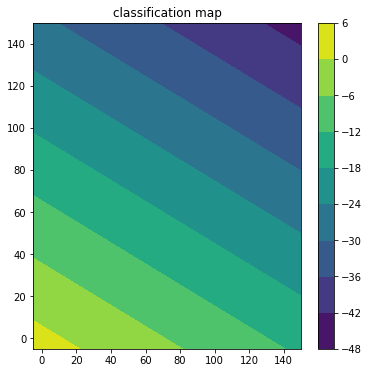

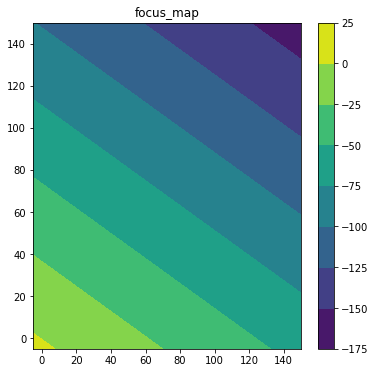

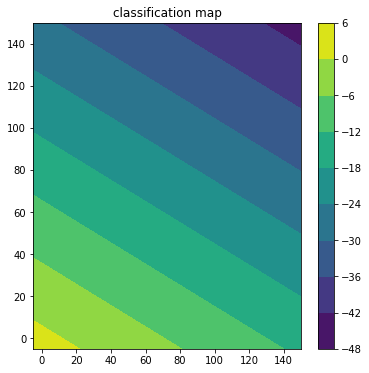

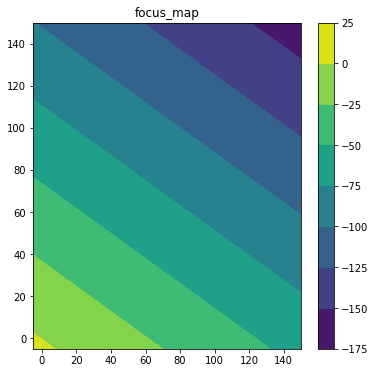

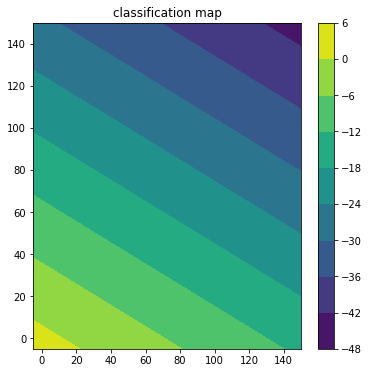

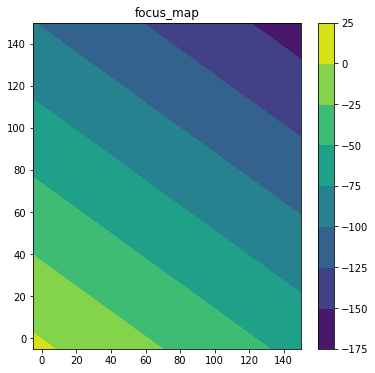

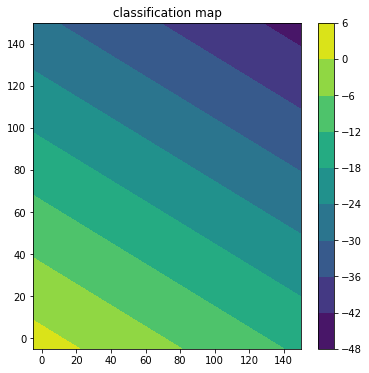

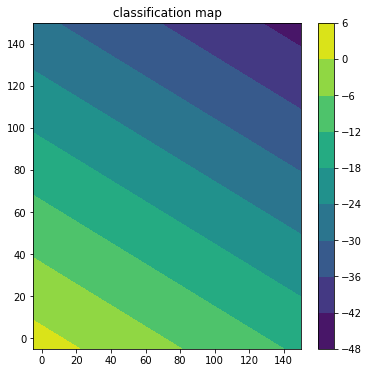

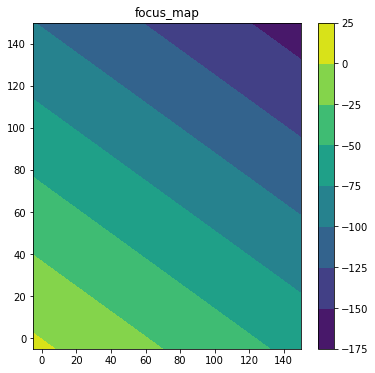

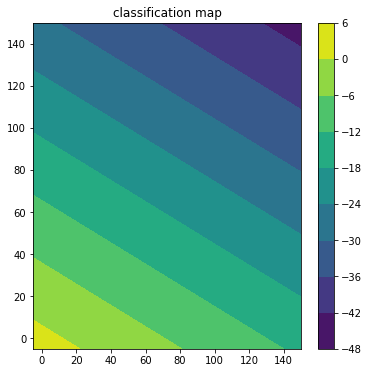

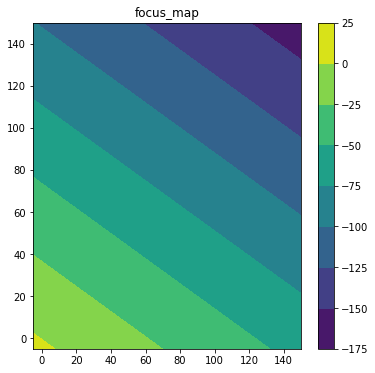

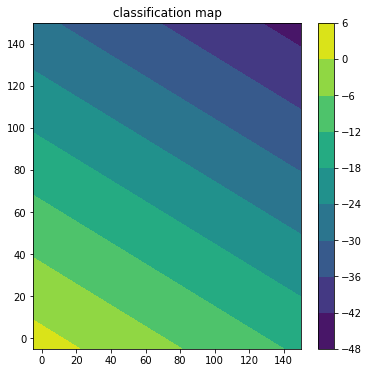

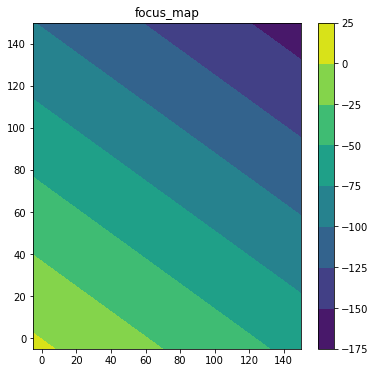

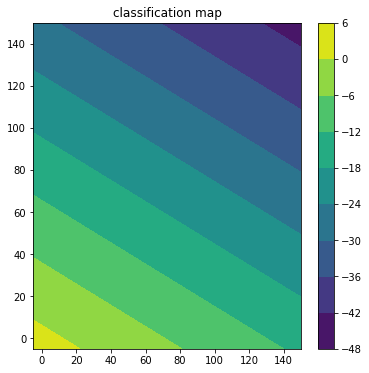

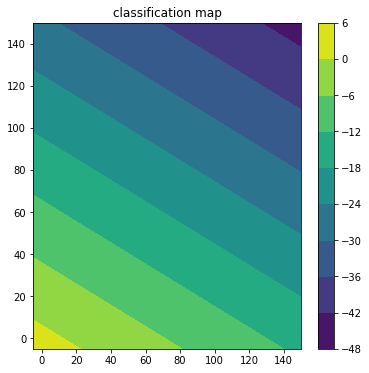

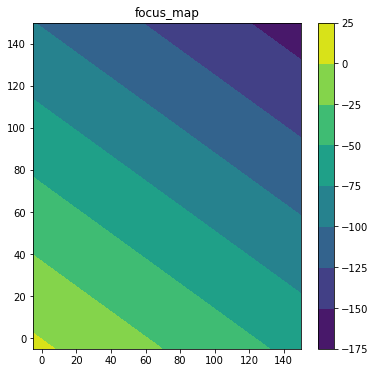

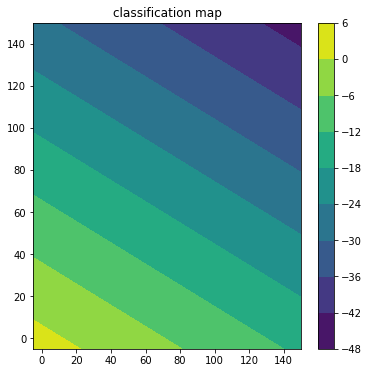

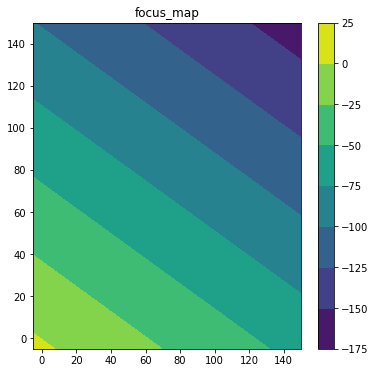

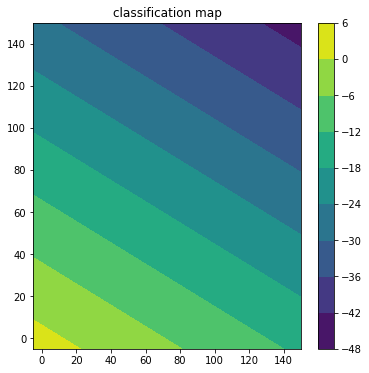

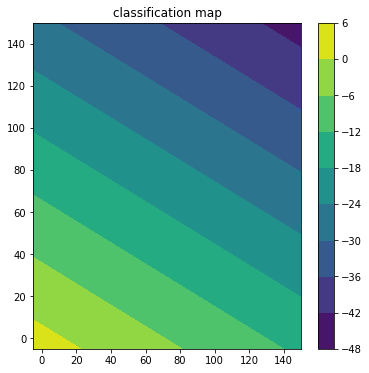

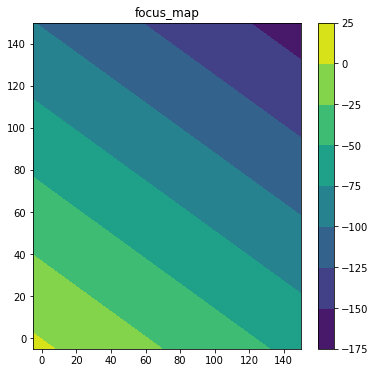

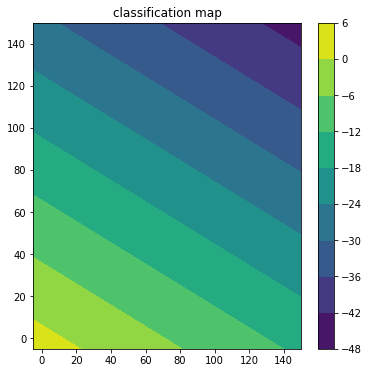

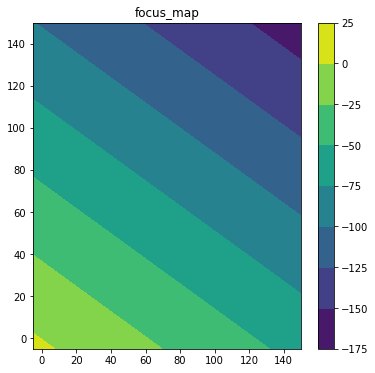

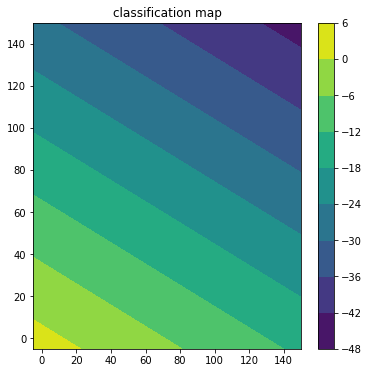

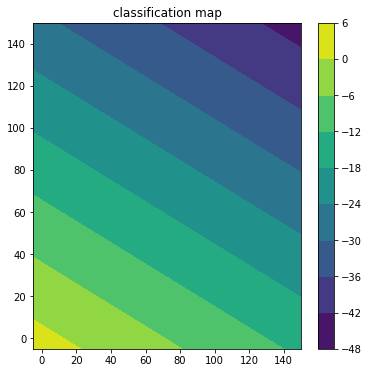

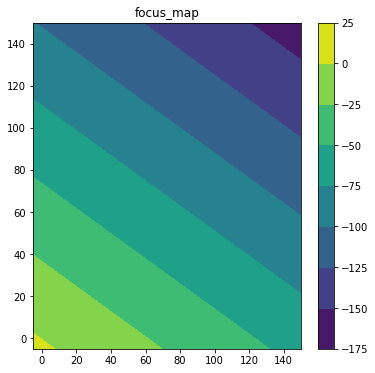

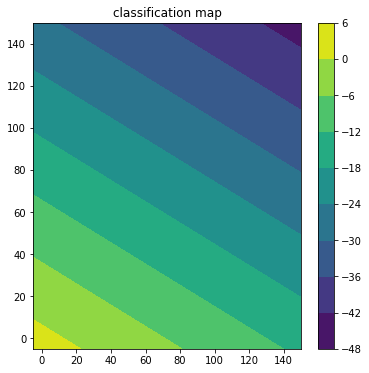

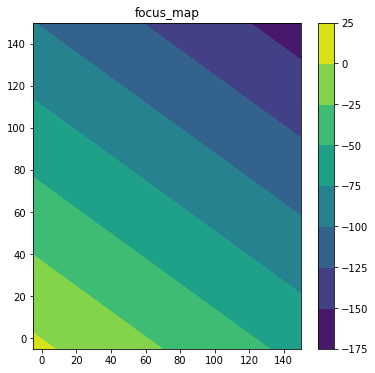

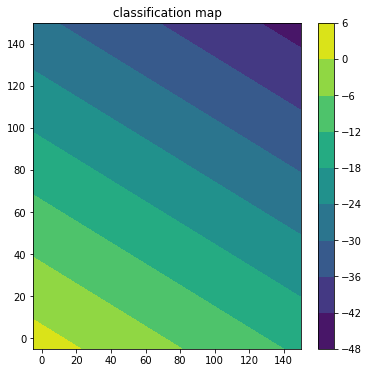

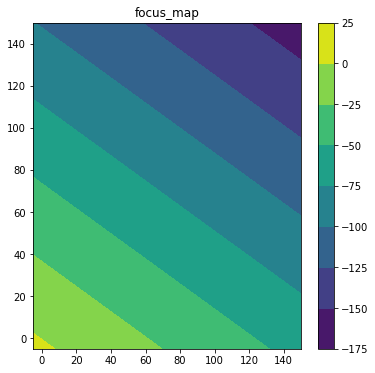

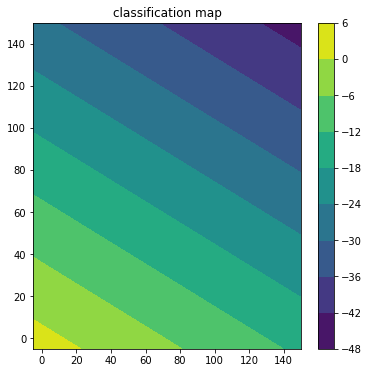

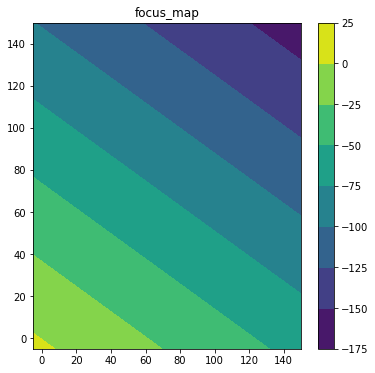

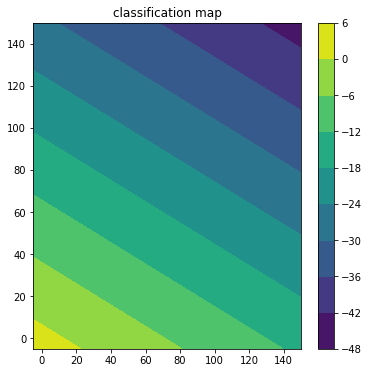

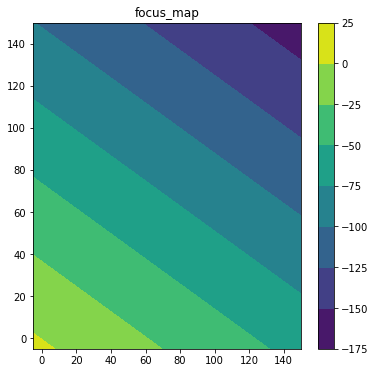

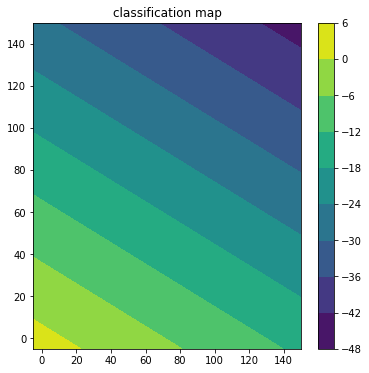

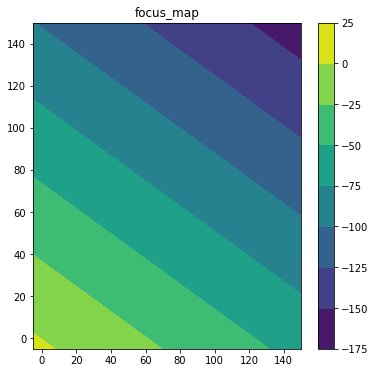

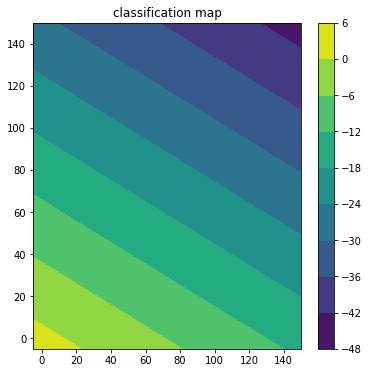

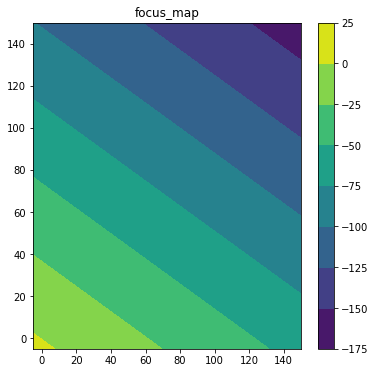

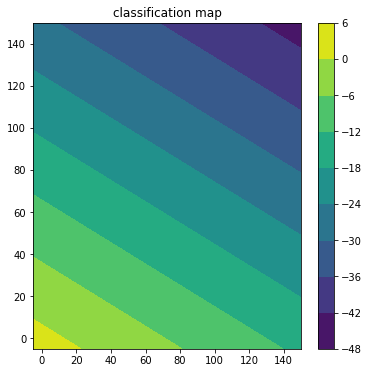

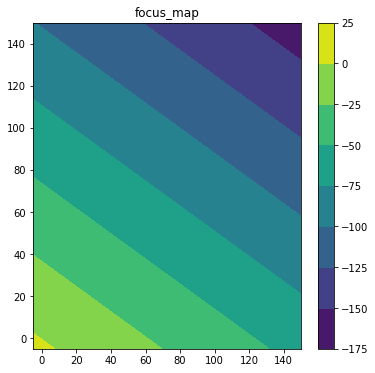

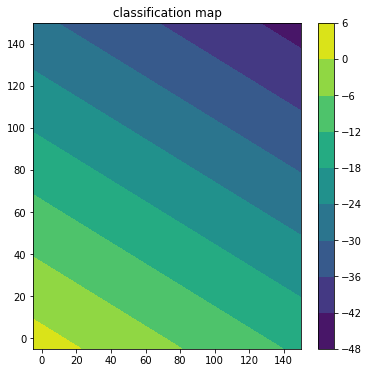

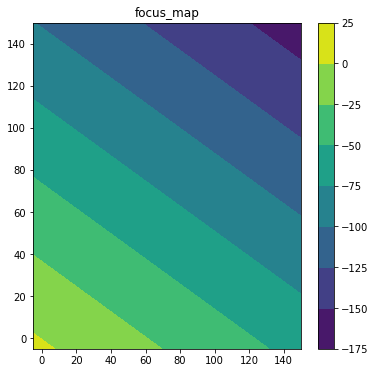

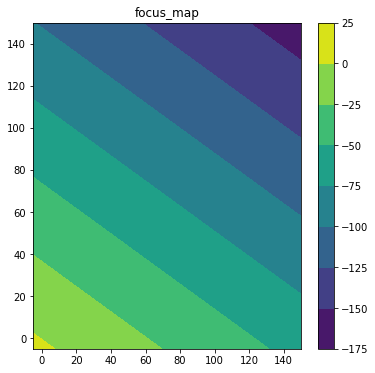

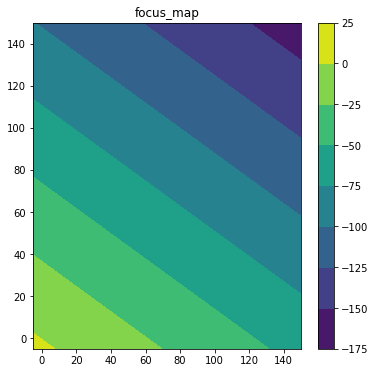

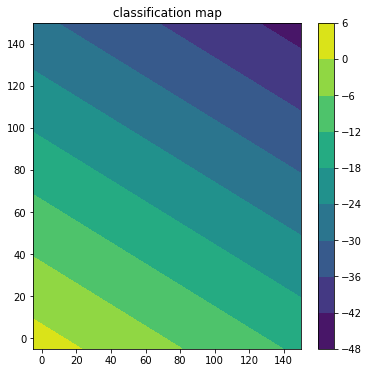

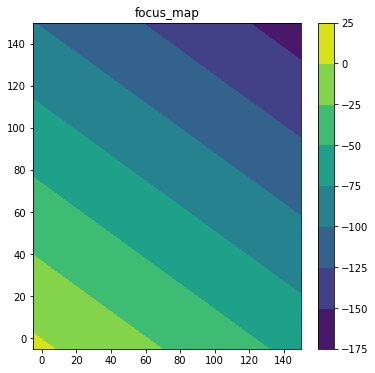

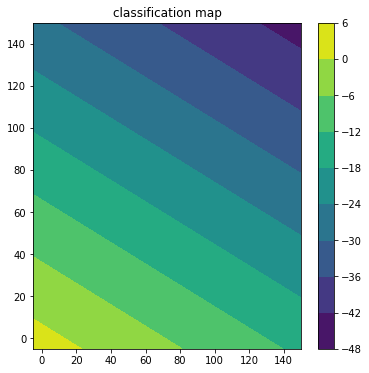

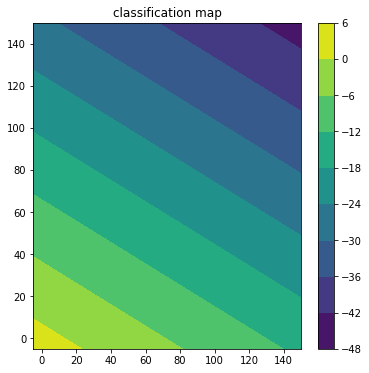

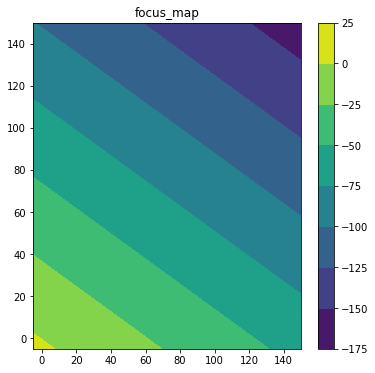

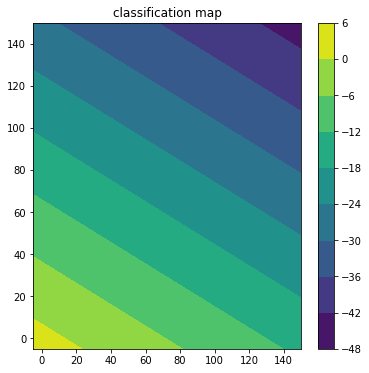

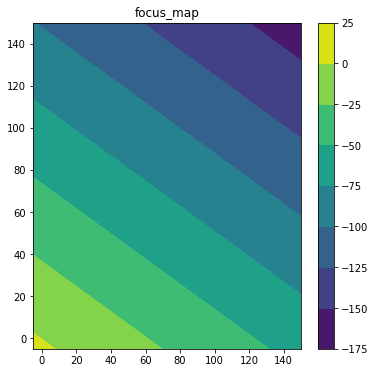

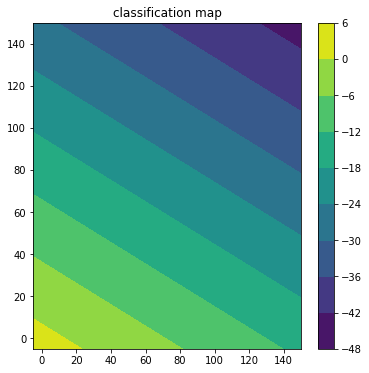

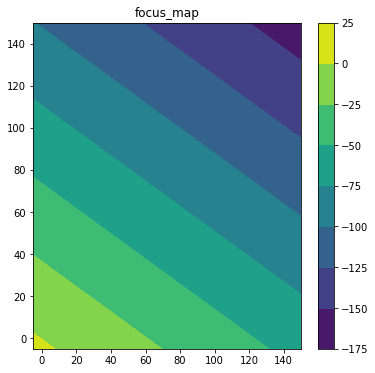

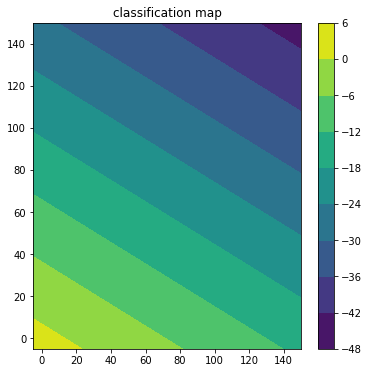

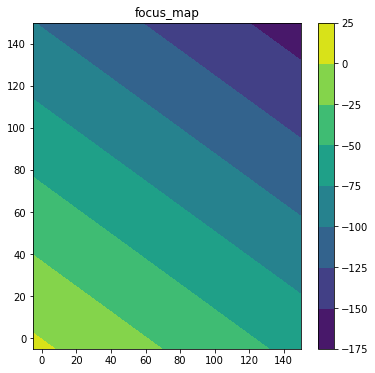

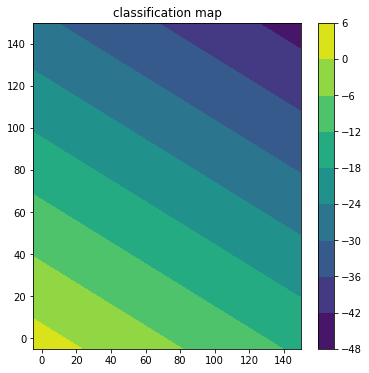

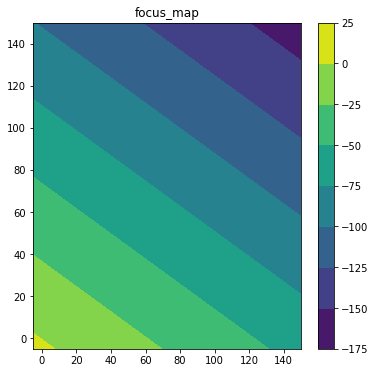

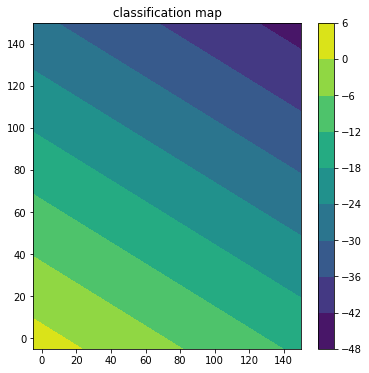

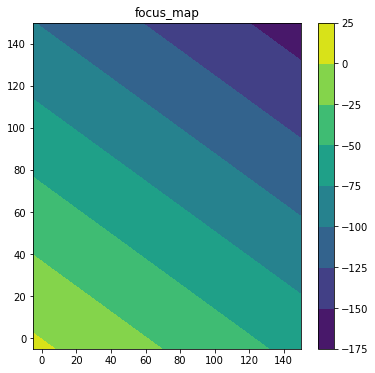

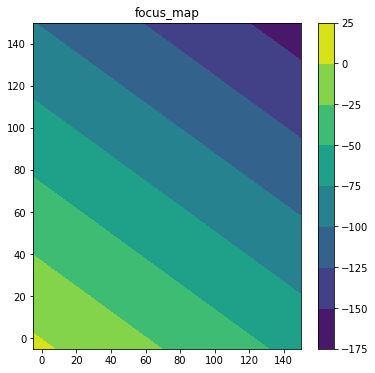

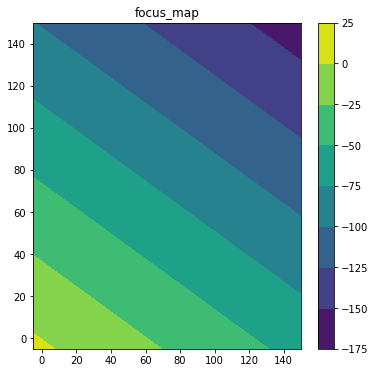

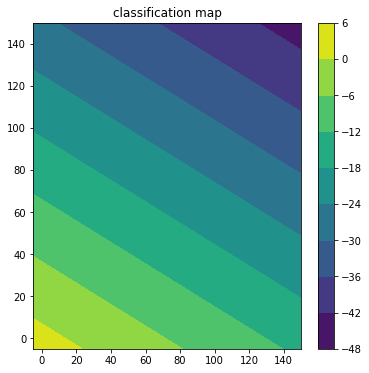

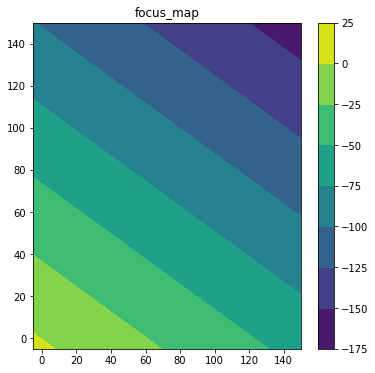

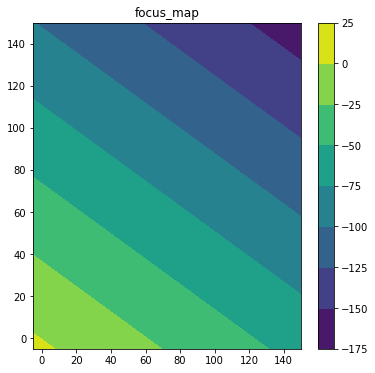

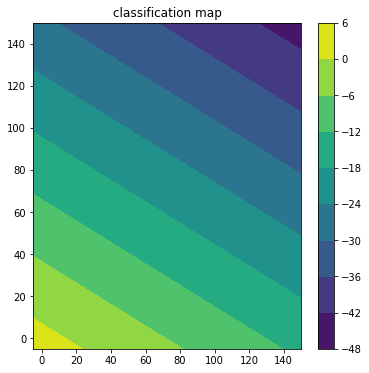

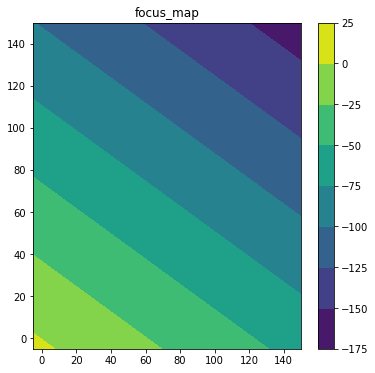

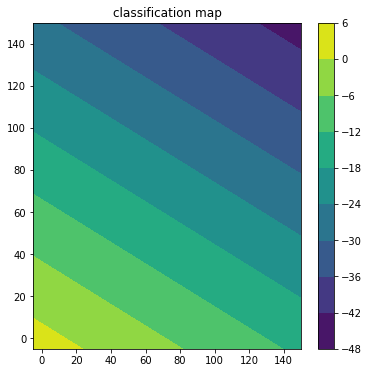

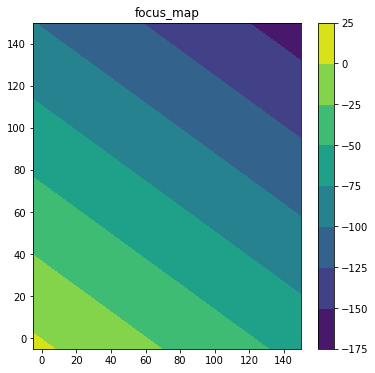

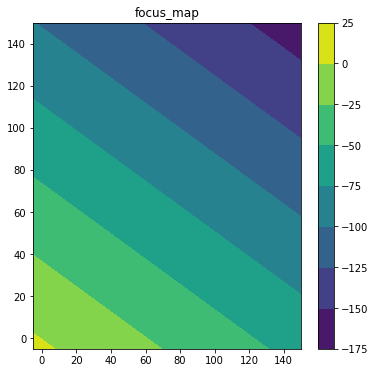

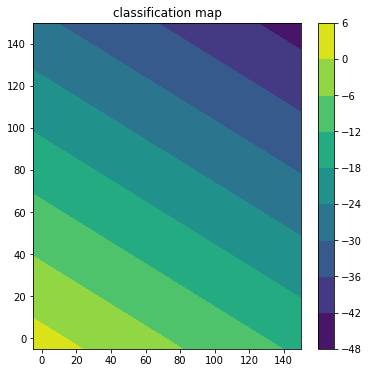

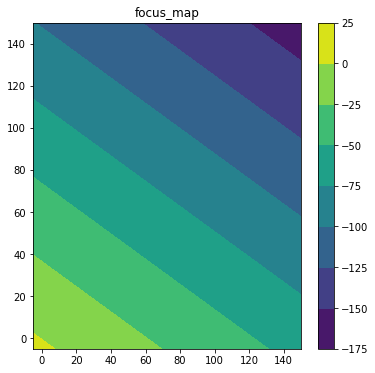

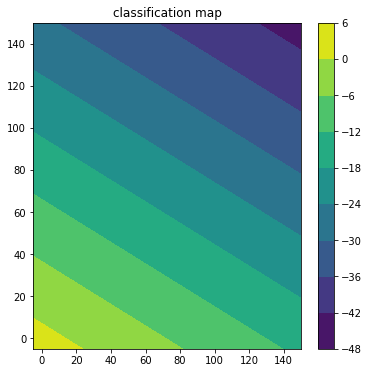

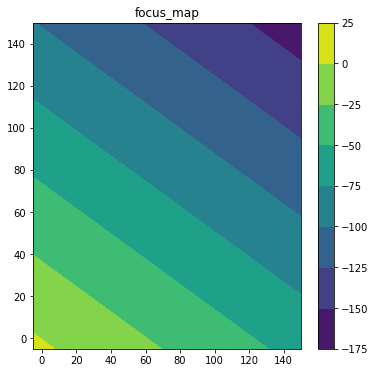

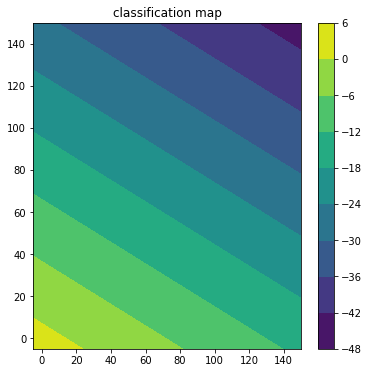

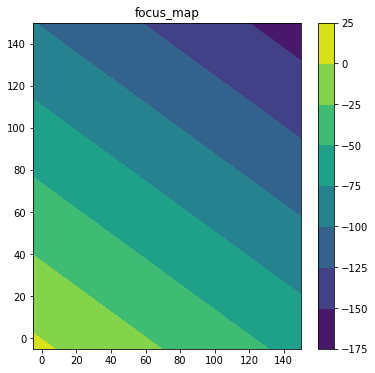

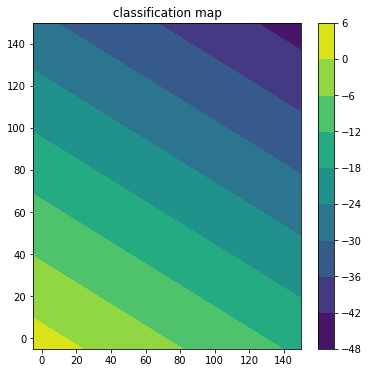

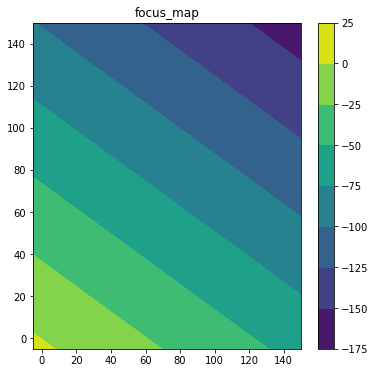

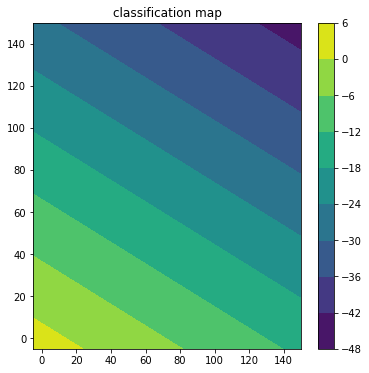

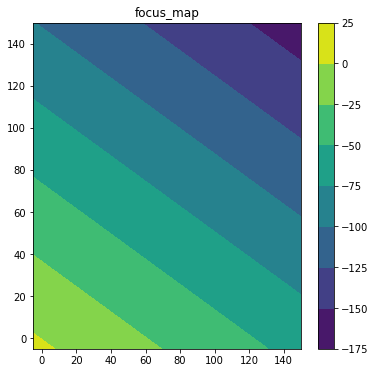

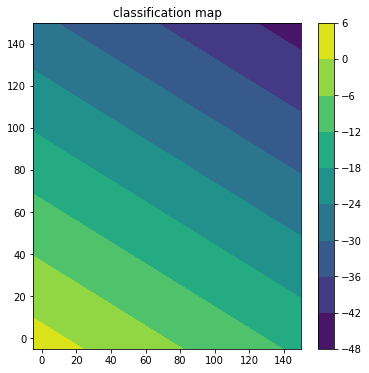

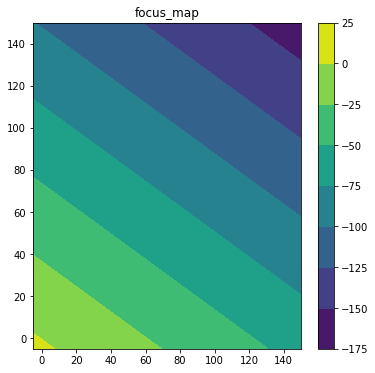

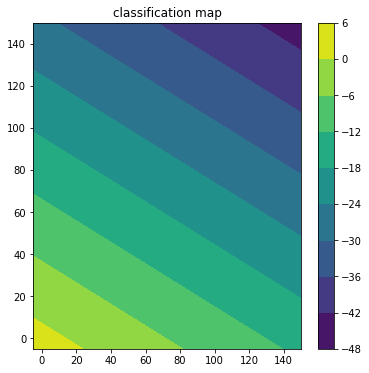

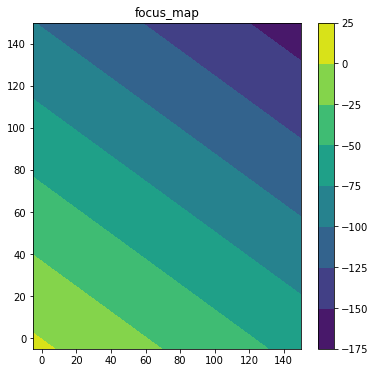

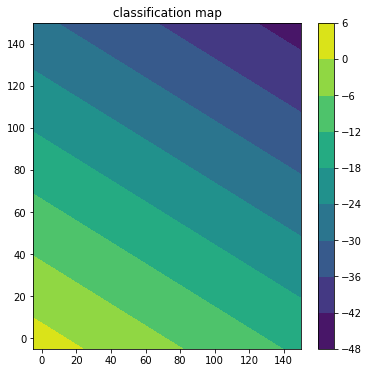

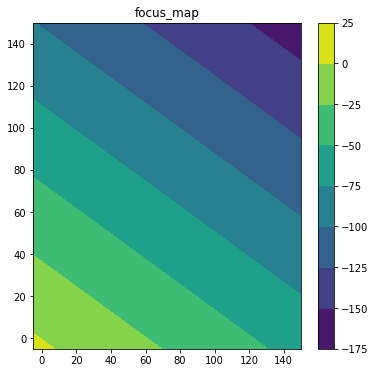

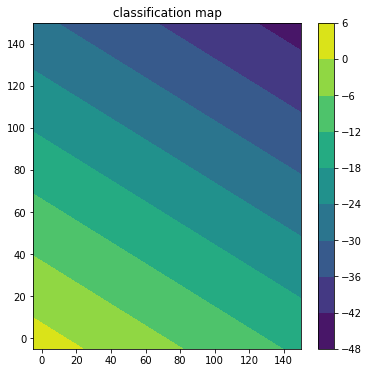

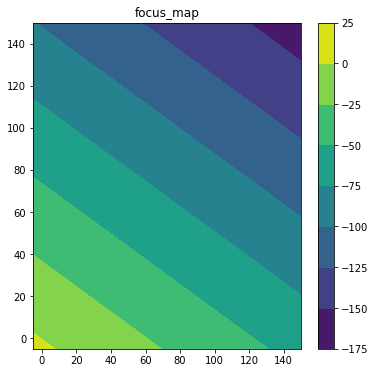

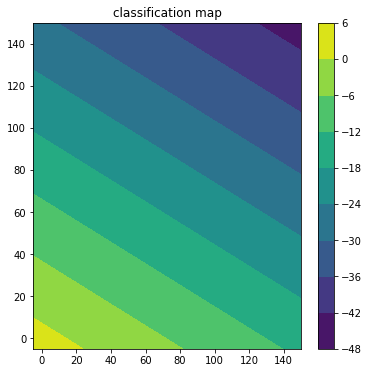

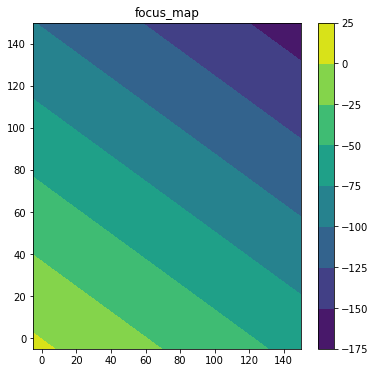

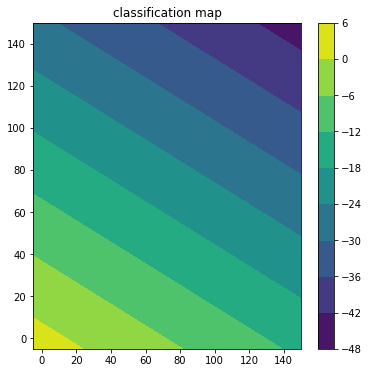

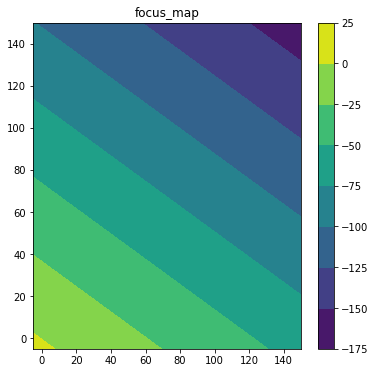

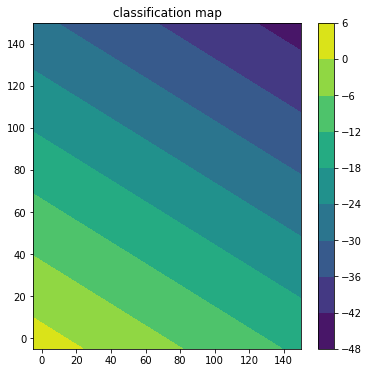

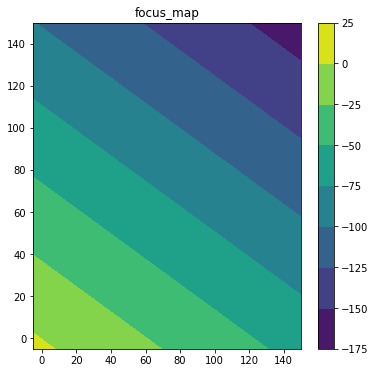

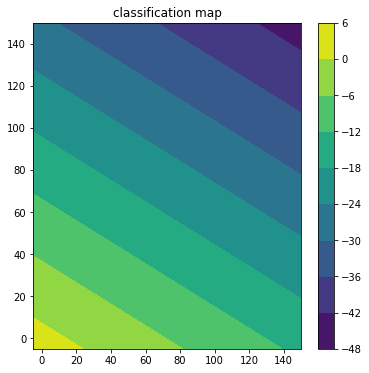

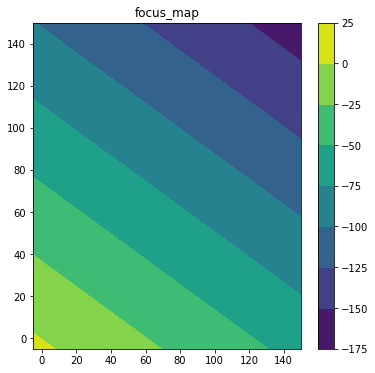

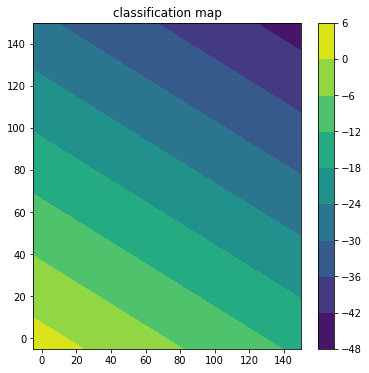

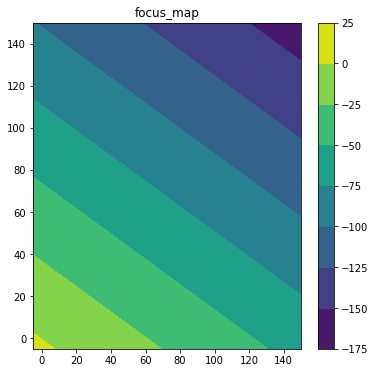

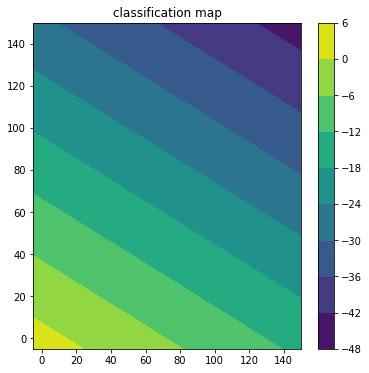

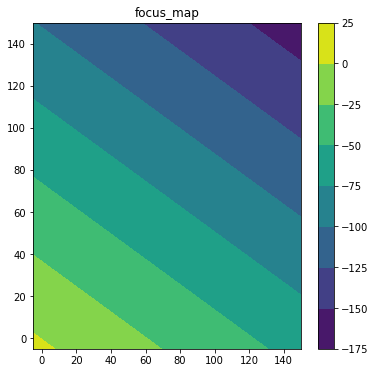

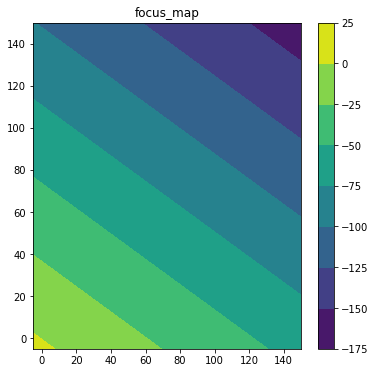

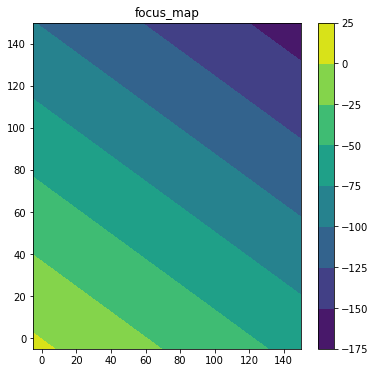

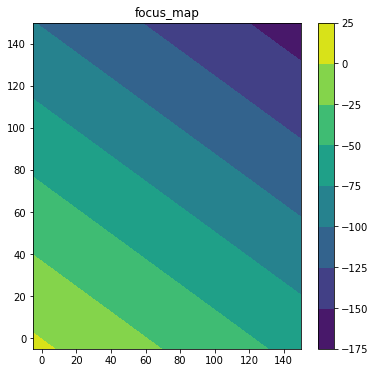

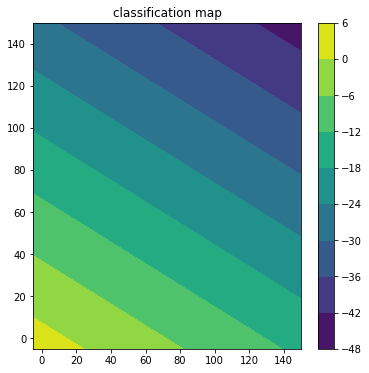

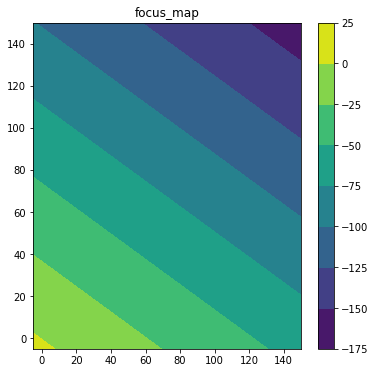

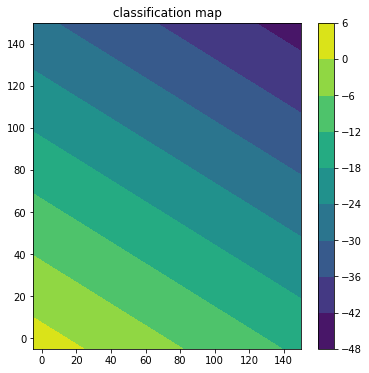

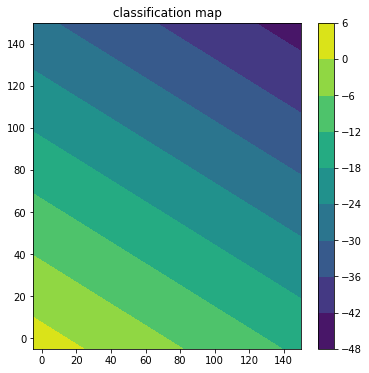

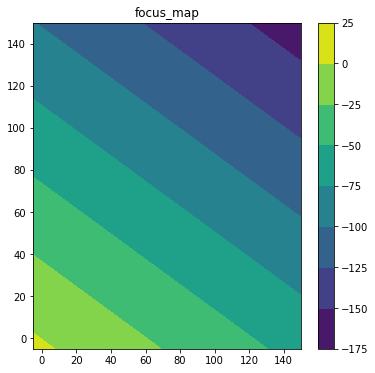

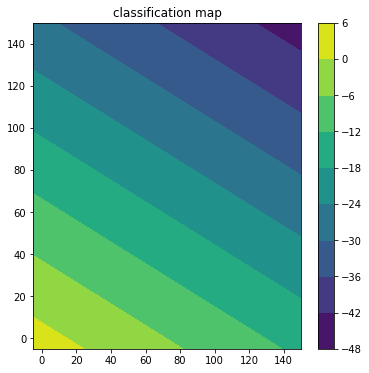

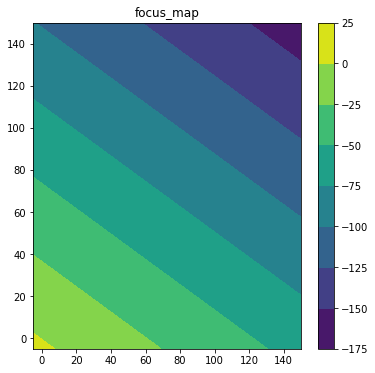

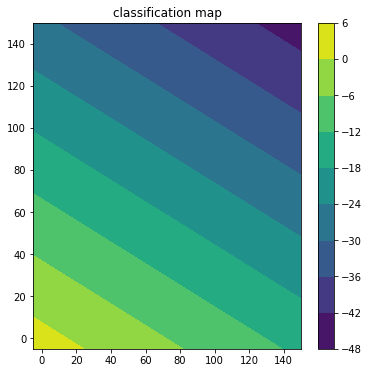

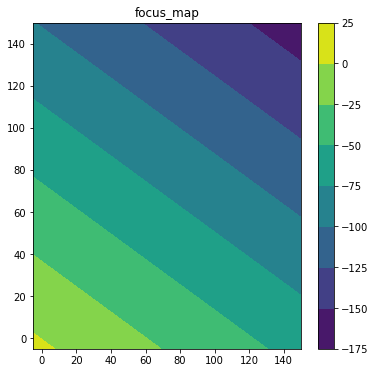

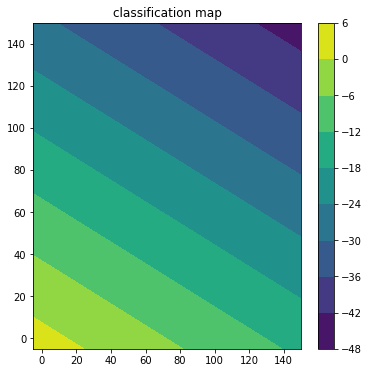

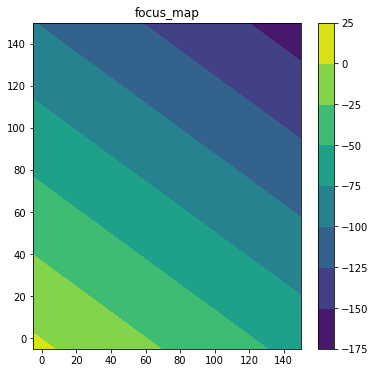

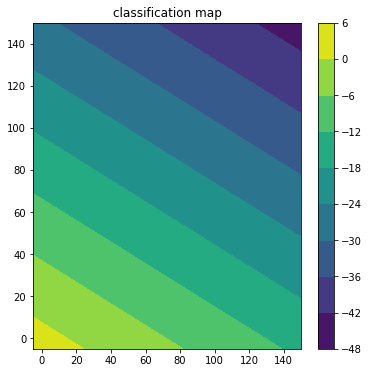

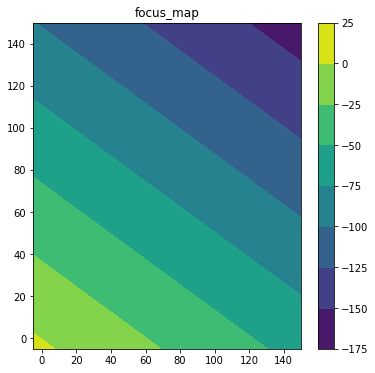

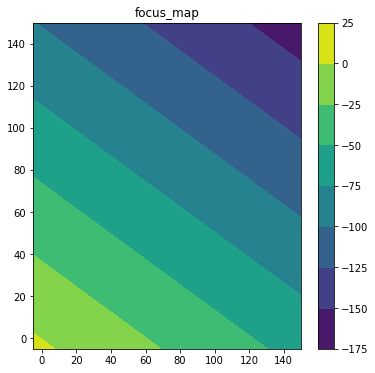

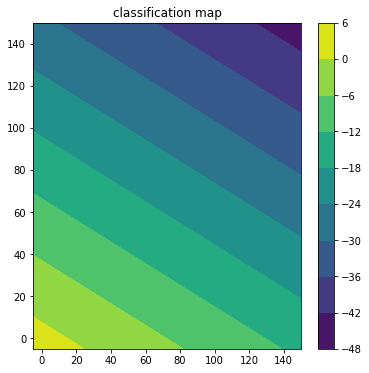

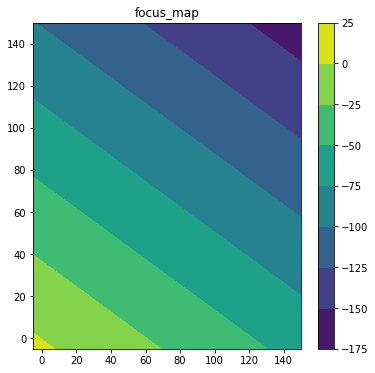

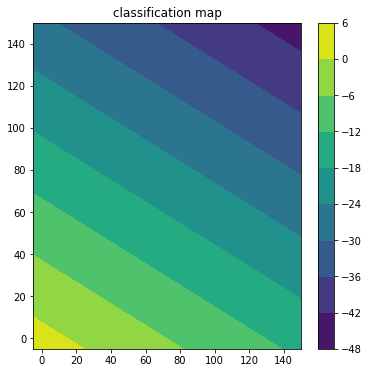

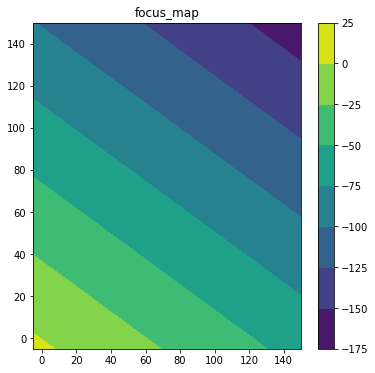

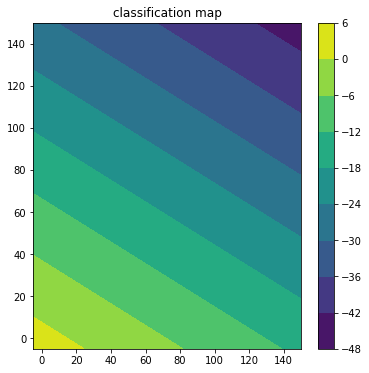

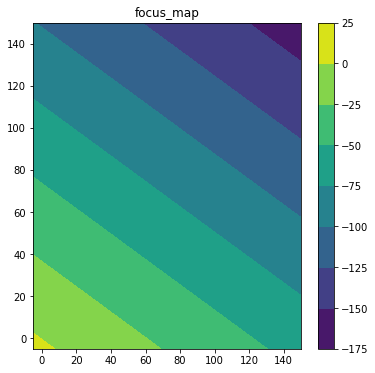

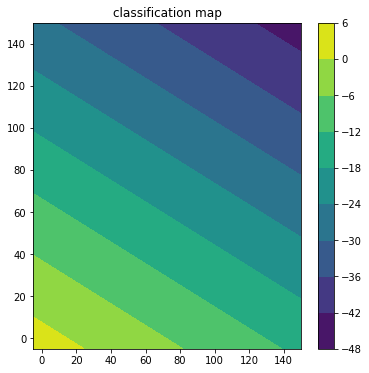

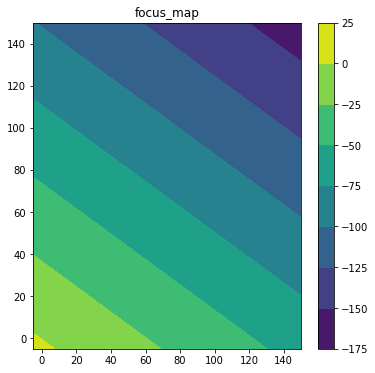

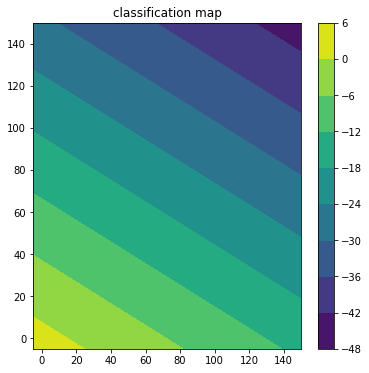

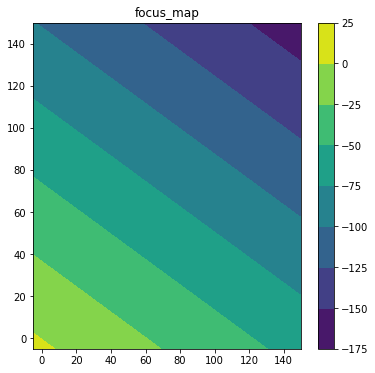

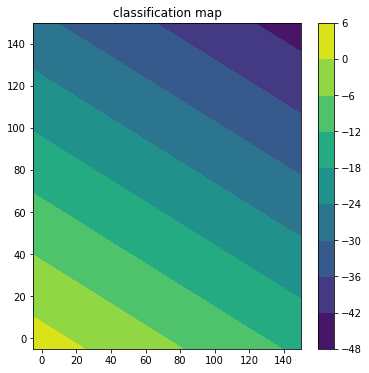

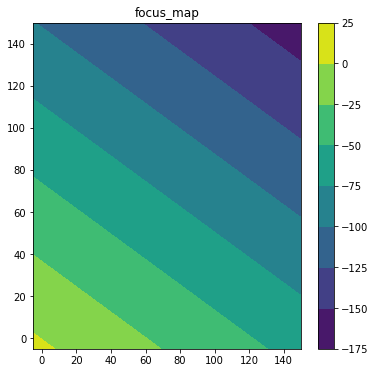

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer_where = optim.SGD(where.parameters(), lr=0.001, momentum=0.9)
optimizer_what = optim.SGD(what.parameters(), lr=0.001, momentum=0.9)




nos_epochs = 200

train_loss=[]

train_acc = [] 
ig = np.random.randint(0,250)


col1 = []
col2 = []
col3 = []
col4 = []
col5 = []

for epoch in range(nos_epochs):  # loop over the dataset multiple times
    focus_true_pred_true =0
    focus_false_pred_true =0
    focus_true_pred_false =0
    focus_false_pred_false =0

    
    avg11_inp = []
    avg11_label = [] 
    running_loss = 0.0
    running_acc = 0
    cnt=0
    c = 0
    total = 0
    iteration = 1384 // batch
    focus_map(where)  # visualize contour map for focus net

    classification_map(what)  # visualise contourmap for classification net
    for i, data in  enumerate(train_loader):
        inputs , labels , fore_idx = data
        inputs = inputs.double()
        batch = inputs.shape[0]
        optimizer_what.zero_grad()
        optimizer_where.zero_grad()
        
        avg_inp,alphas = where(inputs)
        outputs = what(avg_inp)
        
        _, predicted = torch.max(outputs.data, 1)
        
        avg11_inp.append(avg_inp.detach().numpy())
        avg11_label.append(labels.numpy())
        if(c==0):
           
            #disp_plot(inputs[11,:],avg_inp[11],labels[11].numpy()
                      #,predicted[11].numpy(), avg_inp[11,:], fore_idx[11].numpy())
            c+=1
            
        loss = criterion(outputs, labels) 
        loss.backward() 
        
        optimizer_what.step()
        optimizer_where.step() 
        

        running_loss += loss.item()
        running_acc+=sum(predicted.cpu().numpy()== labels.cpu().numpy())
        total += predicted.shape[0]
        if cnt % 5 == 4:    # print every 8 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss/5 ))
            print('[%d,%5d] accuracy: %.3f' %(epoch + 1, cnt+1,running_acc/total))
            
            train_loss.append(running_loss/5)
            train_acc.append(running_acc /total)
            running_loss = 0.0
            running_acc = 0
            
            #torch.save(where.state_dict(),"weight_elemental_2/where_model_epoch"+str(epoch)+".pt")
            #torch.save(what.state_dict(),"weight_elemental_2/what_model_epoch"+str(epoch)+".pt")
        cnt=cnt+1

        if epoch%1 == 0:
          for j in range (batch):
            focus = torch.argmax(alphas[j])
            if(focus == fore_idx[j] and predicted[j] == labels[j]):
              focus_true_pred_true += 1
            elif(focus != fore_idx[j] and predicted[j] == labels[j]):
              focus_false_pred_true +=1
            elif(focus == fore_idx[j] and predicted[j] != labels[j]):
              focus_true_pred_false +=1
            elif(focus != fore_idx[j] and predicted[j] != labels[j]):
              focus_false_pred_false +=1

    if epoch % 1 == 0:
      col1.append(epoch)
      col2.append(focus_true_pred_true)
      col3.append(focus_false_pred_true)
      col4.append(focus_true_pred_false)
      col5.append(focus_false_pred_false)
        
print('Finished Training')
#torch.save(where.state_dict(),"weight_elemental_2/where_model_epoch"+str(nos_epochs)+".pt")
#torch.save(what.state_dict(),"weight_elemental_2/what_model_epoch"+str(epoch)+".pt")       
        
        
        

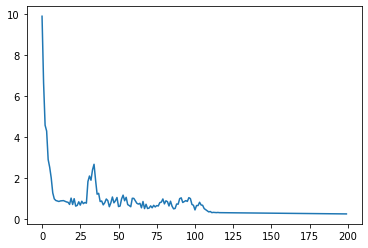

In [32]:
plt.plot(train_loss,label = "train loss")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("train_loss4.png")
plt.savefig("train_loss4.pdf")

In [33]:
plt.plot(train_acc,label ="train_acc")
plt.savefig("train_acc4.png")
plt.savefig("train_acc4.pdf")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [34]:
columns = ["epochs",  "focus_true_pred_true", "focus_false_pred_true", "focus_true_pred_false", "focus_false_pred_false" ]


In [35]:
df_train = pd.DataFrame()
df_train[columns[0]] = col1
df_train[columns[1]] = col2
df_train[columns[2]] = col3
df_train[columns[3]] = col4
df_train[columns[4]] = col5

In [36]:
plt.figure(figsize =(6,6))
plt.plot(col1,col2, label ="focus_true_pred_true ")
plt.plot(col1,col3, label ="focus_false_pred_true ")
plt.plot(col1,col4, label ="focus_true_pred_false ")
plt.plot(col1,col5, label ="focus_false_pred_false ")
plt.title("On Training set")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.savefig("trends4.png")
plt.savefig("trends4.pdf")
plt.show()



In [37]:
dat = np.concatenate(avg11_inp,axis=0)

In [38]:
lbls = np.concatenate(avg11_label,axis=0)

In [39]:
dat[:,0].shape

(1384,)

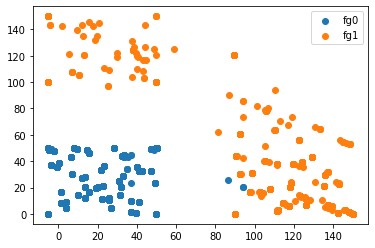

In [40]:
plt.scatter(dat[lbls==0,0],dat[lbls==0,1],label = "fg0")
plt.scatter(dat[lbls==1,0],dat[lbls==1,1],label = "fg1")
plt.legend()

In [41]:
df_train.to_csv("analysis4.csv",index=False)